# Polish Companies Bankruptcy data set

## Biblioteki

In [ ]:
# dependencies
%pip install ucimlrepo optuna ipywidgets tqdm minisom numpy pandas matplotlib scikit-learn imbalanced-learn tensorflow seaborn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=4f96db5c094eba6a47e258047ecc5c9c769816d4a3e4dd3644b7bb879a4ed14e
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
import optuna
import warnings

warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

## Dataset

Zbiór danych pochodzi z Emerging Markets Information
Service (EMIS), platformy zawierającej informacje o rynkach
wschodzących. Został stworzony w celu przewidywania
bankructwa polskich firm na podstawie ich wskaźników
finansowych. Celem analizy jest odpowiedzenie na pytanie:
Czy firma zbankrutuje w określonym przedziale czasowym,
na podstawie jej danych finansowych?

Zbiór danych składa się z pięciu podzbiorów, w których
znajdują się informacje ze sprawozdań finansowych firm po
określonym czasie działalności (np. po jednym roku).
Analizowane są one w kontekście przewidywania bankructwa
w różnych okresach czasowych, od jednego do pięciu lat. Na
podstawie tych danych dokonuje się klasyfikacji firm na te,
które zbankrutują, oraz te, które przetrwają.

## Atrybuty

Liczba atrybutów: 64 + klasa ze statusem bankructwa po danym okresie czasu
- Typ atrybutów: Wszystkie atrybuty mają typ liczbowy ciągły. Są to wskaźniki finansowe firm.
- Liczba instancji/sprawozdań finansowych z danego roku:
- 7,027 dla prognozy 5-letniej
- 10,173 dla prognozy 4-letniej
- 10,503 dla prognozy 3-letniej
- 9,792 dla prognozy 2-letniej
- 5,910 dla prognozy 1-letniej

### Dokładne znaczenie atrybutów

| Attribute | Description                                                                                                           |
|---------|-----------------------------------------------------------------------------------------------------------------------|
| A1      | net profit / total assets                                                                                             |
| A2      | total liabilities / total   assets                                                                                    |
| A3      | working capital / total assets                                                                                        |
| A4      | current assets /   short-term liabilities                                                                             |
| A5      | [(cash + short-term securities + receivables -   short-term liabilities) / (operating eApenses - depreciation)] * 365 |
| A6      | retained earnings / total   assets                                                                                    |
| A7      | EBIT / total assets                                                                                                   |
| A8      | book value of equity /   total liabilities                                                                            |
| A9      | sales / total assets                                                                                                  |
| A10     | equity / total assets                                                                                                 |
| A11     | (gross profit + extraordinary items + financial   expenses) / total assets                                            |
| A12     | gross profit / short-term   liabilities                                                                               |
| A13     | (gross profit + depreciation) / sales                                                                                 |
| A14     | (gross profit + interest)   / total assets                                                                            |
| A15     | (total liabilities * 365) / (gross profit +   depreciation)                                                           |
| A16     | (gross profit +   depreciation) / total liabilities                                                                   |
| A17     | total assets / total liabilities                                                                                      |
| A18     | gross profit / total   assets                                                                                         |
| A19     | gross profit / sales                                                                                                  |
| A20     | (inventory * 365) / sales                                                                                             |
| A21     | sales (n) / sales (n-1)                                                                                               |
| A22     | profit on operating   activities / total assets                                                                       |
| A23     | net profit / sales                                                                                                    |
| A24     | gross profit (in 3 years)   / total assets                                                                            |
| A25     | (equity - share capital) / total assets                                                                               |
| A26     | (net profit +   depreciation) / total liabilities                                                                     |
| A27     | profit on operating activities / financial expenses                                                                   |
| A28     | working capital / fixed   assets                                                                                      |
| A29     | logarithm of total assets                                                                                             |
| A30     | (total liabilities - cash)   / sales                                                                                  |
| A31     | (gross profit + interest) / sales                                                                                     |
| A32     | (current liabilities *   365) / cost of products sold                                                                 |
| A33     | operating expenses / short-term liabilities                                                                           |
| A34     | operating expenses / total   liabilities                                                                              |
| A35     | profit on sales / total assets                                                                                        |
| A36     | total sales / total assets                                                                                            |
| A37     | (current assets - inventories) / long-term   liabilities                                                              |
| A38     | constant capital / total   assets                                                                                     |
| A39     | profit on sales / sales                                                                                               |
| A40     | (current assets -   inventory - receivables) / short-term liabilities                                                 |
| A41     | total liabilities / ((profit on operating   activities + depreciation) * (12/365))                                    |
| A42     | profit on operating   activities / sales                                                                              |
| A43     | rotation receivables + inventory turnover in days                                                                     |
| A44     | (receivables * 365) /   sales                                                                                         |
| A45     | net profit / inventory                                                                                                |
| A46     | (current assets -   inventory) / short-term liabilities                                                               |
| A47     | (inventory * 365) / cost of products sold                                                                             |
| A48     | EBITDA (profit on   operating activities - depreciation) / total assets                                               |
| A49     | EBITDA (profit on operating activities -   depreciation) / sales                                                      |
| A50     | current assets / total   liabilities                                                                                  |
| A51     | short-term liabilities / total assets                                                                                 |
| A52     | (short-term liabilities *   365) / (cost of products sold)                                                            |
| A53     | equity / fixed assets                                                                                                 |
| A54     | constant capital / fixed   assets                                                                                     |
| A55     | working capital                                                                                                       |
| A56     | (sales - cost of products   sold) / sales                                                                             |
| A57     | (current assets - inventory - short-term   liabilities) / (sales - gross profit - depreciation)                       |
| A58     | total costs /total sales                                                                                              |
| A59     | long-term liabilities / equity                                                                                        |
| A60     | sales / inventory                                                                                                     |
| A61     | sales / receivables                                                                                                   |
| A62     | (short-term liabilities   *365) / sales                                                                               |
| A63     | sales / short-term liabilities                                                                                        |
| A64     | sales / fixed assets                                                                                                  |

oryginalna liczba instancji:  43405


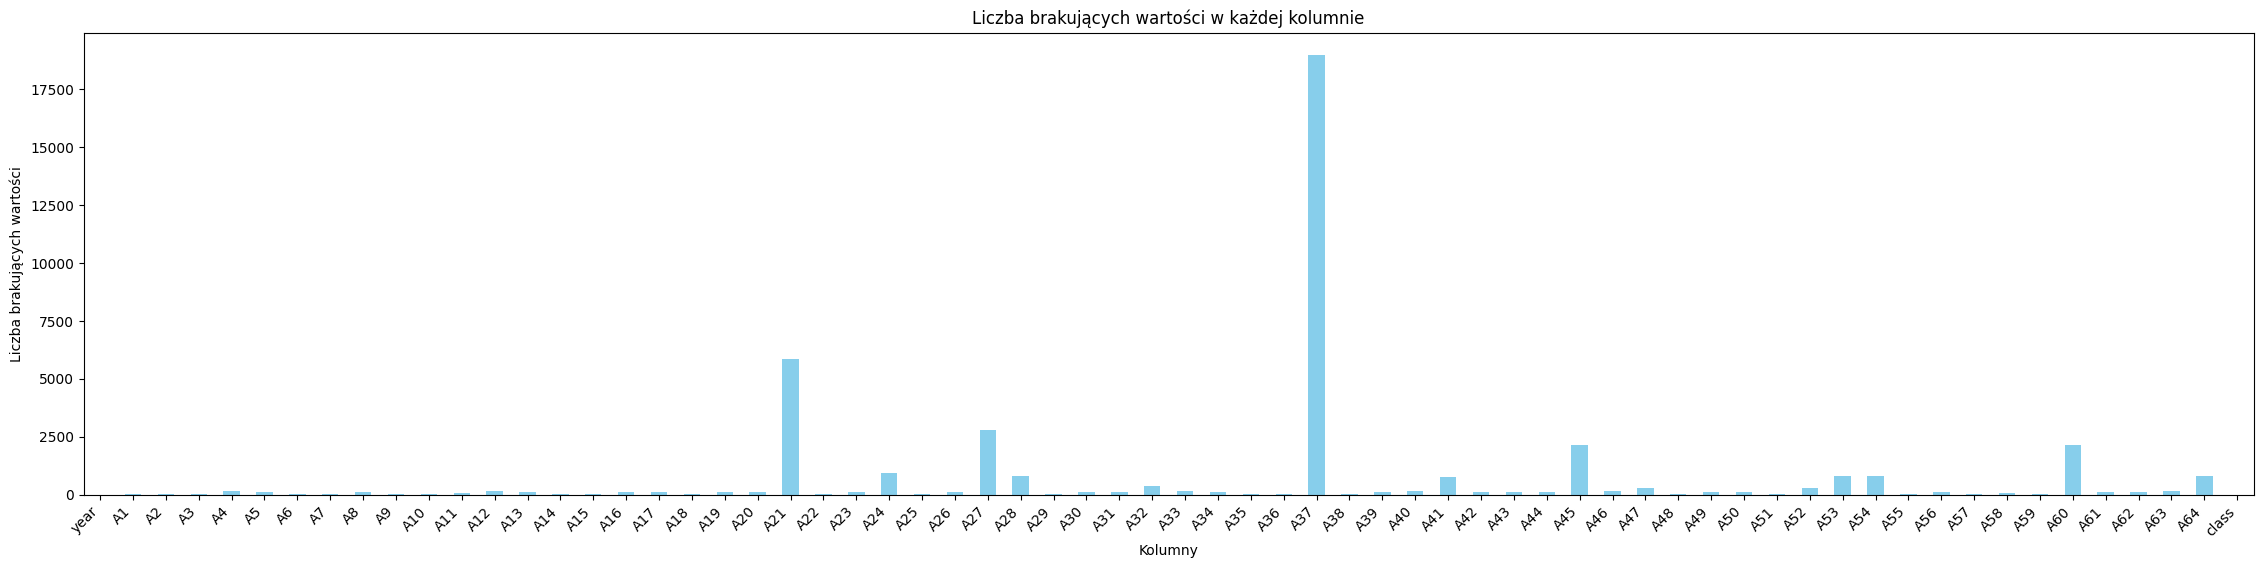

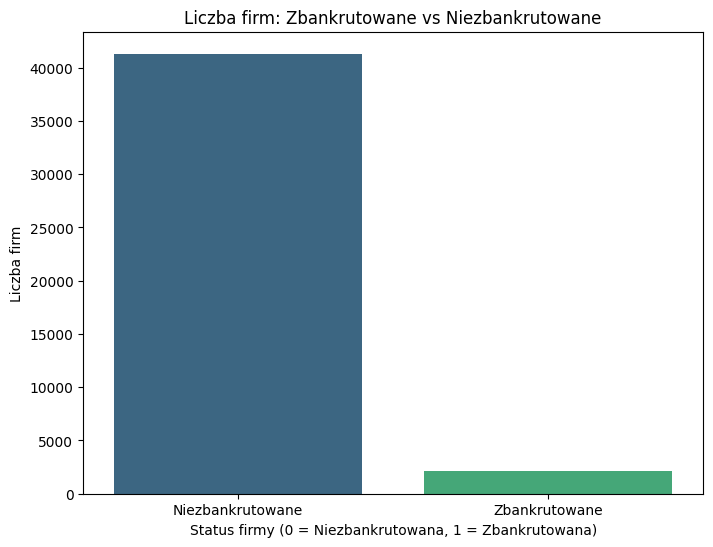

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

dataset = fetch_ucirepo(id=365)
# dla ułatwienia manipulacji danymi, łącze tymczasowo atrybuty z wynikiem przyporządkowania
unprocessed_data = dataset.data.features.join(dataset.data.targets)
n_rows = unprocessed_data.shape[0]
print('oryginalna liczba instancji: ', n_rows)


df = unprocessed_data


# 1. Liczba brakujących wartości w każdej kolumnie
missing_values = df.isnull().sum()
plt.figure(figsize=(28, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Liczba brakujących wartości w każdej kolumnie')
plt.xlabel('Kolumny')
plt.ylabel('Liczba brakujących wartości')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Liczba firm, które zbankrutowały vs te, które nie
bankruptcy_counts = df['class'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=bankruptcy_counts.index, y=bankruptcy_counts.values, palette='viridis')
plt.title('Liczba firm: Zbankrutowane vs Niezbankrutowane')
plt.xlabel('Status firmy (0 = Niezbankrutowana, 1 = Zbankrutowana)')
plt.ylabel('Liczba firm')
plt.xticks([0, 1], labels=['Niezbankrutowane', 'Zbankrutowane'])
plt.show()









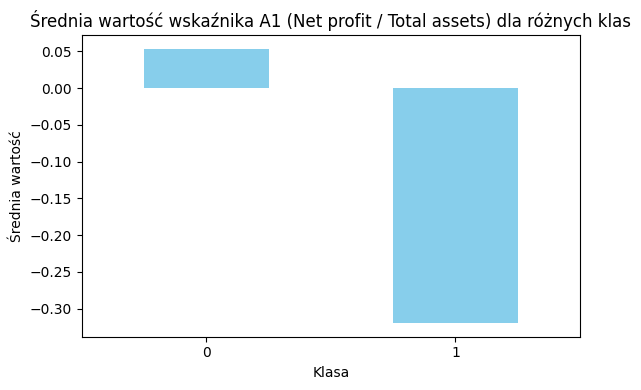

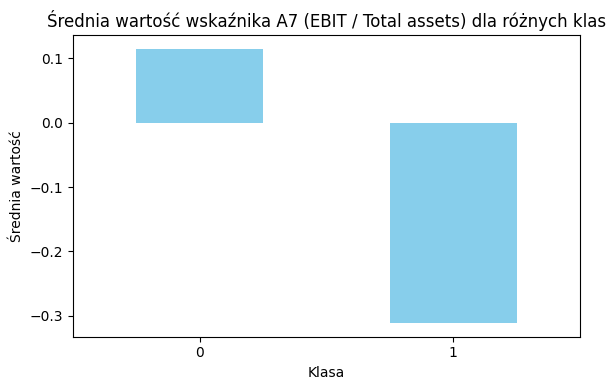

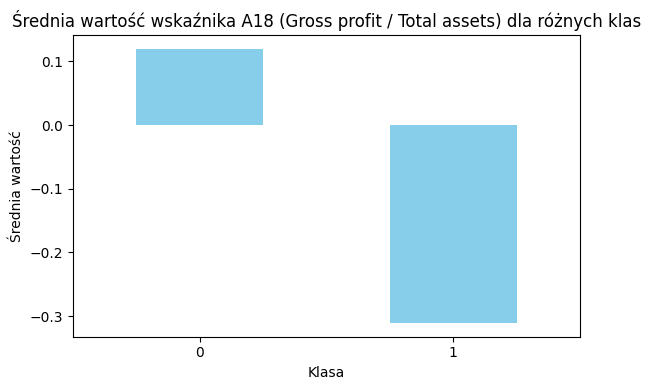

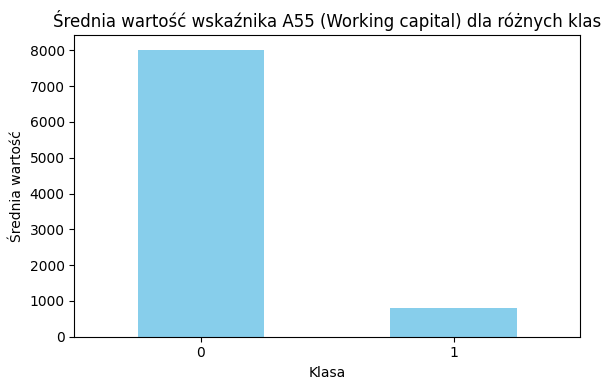

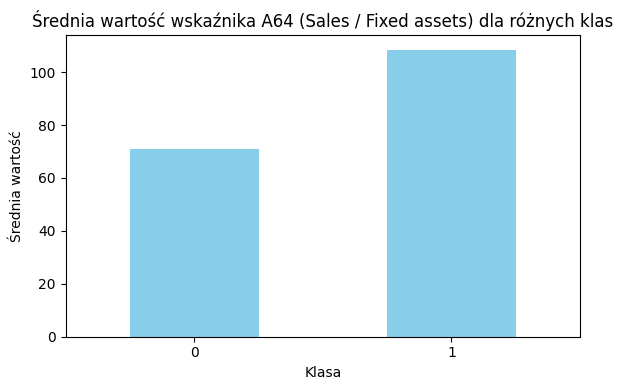

In [ ]:
indicator_names = {
    'A1': 'Net profit / Total assets',
    'A7': 'EBIT / Total assets',
    'A18': 'Gross profit / Total assets',
    'A55': 'Working capital',
    'A64': 'Sales / Fixed assets'
}

indicators = ['A1', 'A7', 'A18', 'A55', 'A64']

# Tworzenie wykresów dla każdego wskaźnika osobno
for indicator in indicators:
    avg_indicator = df.groupby('class')[indicator].mean()
    plt.figure(figsize=(6, 4))
    avg_indicator.plot(kind='bar', color='skyblue')

    plt.title(f'Średnia wartość wskaźnika {indicator} ({indicator_names[indicator]}) dla różnych klas')
    plt.xlabel('Klasa')
    plt.ylabel('Średnia wartość')
    plt.xticks(rotation=0)
    plt.tight_layout()


    plt.show()

In [ ]:
# czyszczenie pustych kolumn
MAX_NULLS = 200
unprocessed_data.dropna(axis=1, thresh=n_rows-MAX_NULLS, inplace=True) # jeśli kolumna ma więcej niż 100 nulli to jest usuwana
print(f'kolumny z mniej niż {MAX_NULLS} pustych wartości: {unprocessed_data.columns}')

# czysczenie wierszy
unprocessed_data.dropna(inplace=True)
print('liczba wierszy po czyszczeniu: ', unprocessed_data.shape[0])

kolumny z mniej niż 200 pustych wartości: Index(['year', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20',
       'A22', 'A23', 'A25', 'A26', 'A29', 'A30', 'A31', 'A33', 'A34', 'A35',
       'A36', 'A38', 'A39', 'A40', 'A42', 'A43', 'A44', 'A46', 'A48', 'A49',
       'A50', 'A51', 'A55', 'A56', 'A57', 'A58', 'A59', 'A61', 'A62', 'A63',
       'class'],
      dtype='object')
liczba wierszy po czyszczeniu:  42980


# Dane po usunięciu brakujących wartości

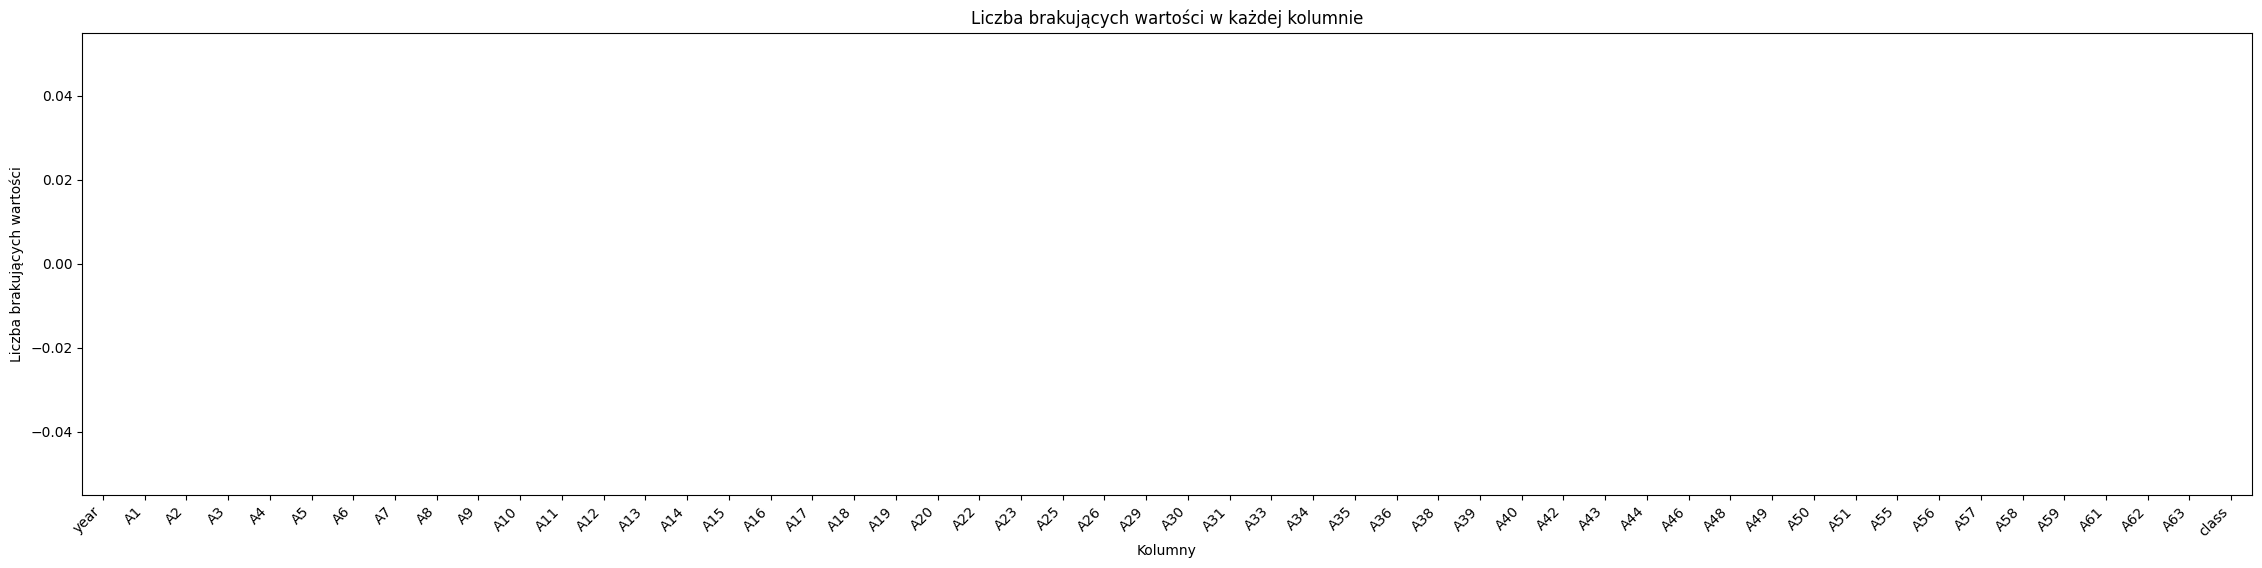

In [ ]:
df = unprocessed_data
missing_values = df.isnull().sum()
plt.figure(figsize=(28, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Liczba brakujących wartości w każdej kolumnie')
plt.xlabel('Kolumny')
plt.ylabel('Liczba brakujących wartości')
plt.xticks(rotation=45, ha='right')
plt.show()


# 1. Załadowanie danych:
Dane zostały załadowane z repozytorium UC Irvine Machine Learning za pomocą funkcji fetch_ucirepo. Następnie atrybuty zostały połączone z wynikami klasyfikacji (targets) w celu łatwiejszej manipulacji.

# 2. Czyszczenie danych:
### a) Usuwanie kolumn z dużą liczbą brakujących wartości:

Przyjęto próg maksymalnej liczby pustych wartości w kolumnie (MAX_NULLS = 200).
Kolumny, które zawierały więcej brakujących wartości niż dozwolony próg, zostały usunięte za pomocą dropna(axis=1, thresh=n_rows-MAX_NULLS).
### b) Usuwanie wierszy z brakującymi wartościami:

Wiersze zawierające brakujące dane zostały usunięte za pomocą dropna(inplace=True).




In [ ]:
# jako że dane nie są ze sobą specjalnie powiązane
# dla każdej długości prognozy utworzony zostanie zaprojektowana osobny dataset i sieć

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data_by_years = [None] * 5
for year, df in unprocessed_data.groupby('year'):
  d = df.drop('year', axis=1)
  data_by_years[year-1] = df.drop('year', axis=1)

# 3. Podział danych według lat:
Dane zostały podzielone na pięć zbiorów odpowiadających poszczególnym latom. Każdy podzbiór został oczyszczony z kolumny year, która była używana do grupowania.

## Rozkład klas

Zbiór jest wysoce niezrównoważony. Na przykład dla 3-go roku prognozowania:
- 495 instancji odpowiada firmom, które zbankrutowały.
- 10,008 instancji odpowiada firmom, które przetrwały.


### Podział danych + oversampling

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = []

KERAS_SEED = 222

for y in data_by_years:
    cloned = y.copy()
    target = cloned.pop('class')
    x_train, x_test, y_train, y_test = train_test_split(cloned, target, test_size=0.5, random_state=KERAS_SEED, stratify=target)

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=KERAS_SEED)
    x_over, y_over = oversampler.fit_resample(x_train_scaled, y_train)

    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=KERAS_SEED)
    x_under, y_under = undersampler.fit_resample(x_train_scaled, y_train)

    data.append({
        # pousuwane nadmiarowe firmy
        'undersampled': {
            'feature': x_under,
            'target': y_under
        },
        # pododawane sztuczne rekordy
        'oversampled': {
            'feature': x_over,
            'target': y_over
        },
        # zbiór danych bez balansowania
        'original': {
            'feature': x_train_scaled,
            'target': y_train
        },
        # zbiór testowy
        'test': {
            'feature': x_test_scaled,
            'target': y_test.values
        }
    })

# 4. Podział na zbiory treningowe i testowe: Dla każdego roku:

Dane zostały podzielone na zbiór treningowy (50%) i testowy (50%) za pomocą funkcji train_test_split z uwzględnieniem stratifikacji (stratify=target), aby zachować proporcje klas w danych.

# 5. Standaryzacja danych:
Dla danych treningowych i testowych przeprowadzono standaryzację:

Dane treningowe zostały dopasowane do obiektu StandardScaler i przeskalowane.
Dane testowe przeskalowano przy użyciu tych samych parametrów.
# 6. Balansowanie klas:
## a) Oversampling:

W zbiorze treningowym klasy niedoreprezentowane zostały zrównoważone przez powielanie istniejących instancji za pomocą RandomOverSampler.
## b) Undersampling:

W zbiorze treningowym klasy nadreprezentowane zostały zredukowane przez usunięcie niektórych instancji za pomocą RandomUnderSampler.
# 7. Struktura danych wyjściowych:
Dla każdego roku utworzono następujące zbiory:

undersampled – dane zrównoważone przez usunięcie nadmiarowych przykładów klasy dominującej.
oversampled – dane zrównoważone przez dodanie sztucznych instancji klasy niedoreprezentowanej.
original – dane bez dodatkowego balansowania.
test – zbiór testowy, który nie był modyfikowany w zakresie liczebności klas.
Dzięki temu procesowi dane zostały oczyszczone, podzielone według lat, zbalansowane i przygotowane do trenowania modeli

# Sieć feed forward

### Funkcje pomocnicze

In [ ]:
def binary_classification(predictions):


    return [1 if x >= 0.5 else 0 for x in predictions]

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn import metrics
from tqdm.keras import TqdmCallback

def ff_test_model(label, train_set, test_set, **params):
      epochs = params['epochs'] or 300


      n_neurons = train_set['feature'].shape[1] #wymiar danych wejsciowych, zostalo nam 50 kolumn wiec 50

      model = tf.keras.Sequential([ #inicjalizacja warstw
          keras.layers.Input(shape=(n_neurons,)),
          keras.layers.Dense(int(n_neurons*0.7), activation='sigmoid'), #sigmoidalna jest dobra dla klasyfikacji binarnej
          keras.layers.Dense(int(n_neurons*0.7*0.5), activation='sigmoid'),
          keras.layers.Dense(1, activation='sigmoid')
      ])

      model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
      history = model.fit(train_set['feature'], train_set['target'], epochs=epochs, batch_size=32, verbose=0, callbacks=[TqdmCallback(verbose=1)],#model.fit jest najistotniejsze, natomiast history uzywamy do wykresu
                validation_data=(test_set['feature'], test_set['target']))

      predicted = model.predict(test_set['feature'])#dokonujemy predyckji na zbiorze testowym
      rounded = binary_classification(predicted)

      print(metrics.classification_report(test_set['target'], rounded)) #metryki precision, recall etc
      print()

      fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,10))#wyswietlanie 3 wykresow w 1 linii
      fig.suptitle(label)

      # accuracy
      ax1.plot(history.history['accuracy'])
      ax1.plot(history.history['val_accuracy'])
      ax1.set_title('Model accuracy')
      ax1.set_ylabel('accuracy')
      ax1.set_xlabel('epoch')
      ax1.legend(['train', 'test'], loc='upper left')

      # loss
      ax2.plot(history.history['loss'])
      ax2.plot(history.history['val_loss'])
      ax2.set_title('Model loss')
      ax2.set_ylabel('loss')
      ax2.set_xlabel('epoch')
      ax2.legend(['train', 'test'], loc='upper left')

      # roc
      fpr, tpr, _ = metrics.roc_curve(test_set['target'], predicted)
      auc = metrics.roc_auc_score(test_set['target'], predicted)

      ax3.plot(fpr, tpr, label=f"AUC= {auc:.2f}")
      ax3.set_title('ROC')
      ax3.set_ylabel('True Positive Rate')
      ax3.set_xlabel('False Positive Rate')
      ax3.legend(loc=4)

      plt.show()

### Sieć feedforward


## Testowanie


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      3357
           1       0.10      0.30      0.15       117

    accuracy                           0.89      3474
   macro avg       0.54      0.60      0.55      3474
weighted avg       0.94      0.89      0.91      3474




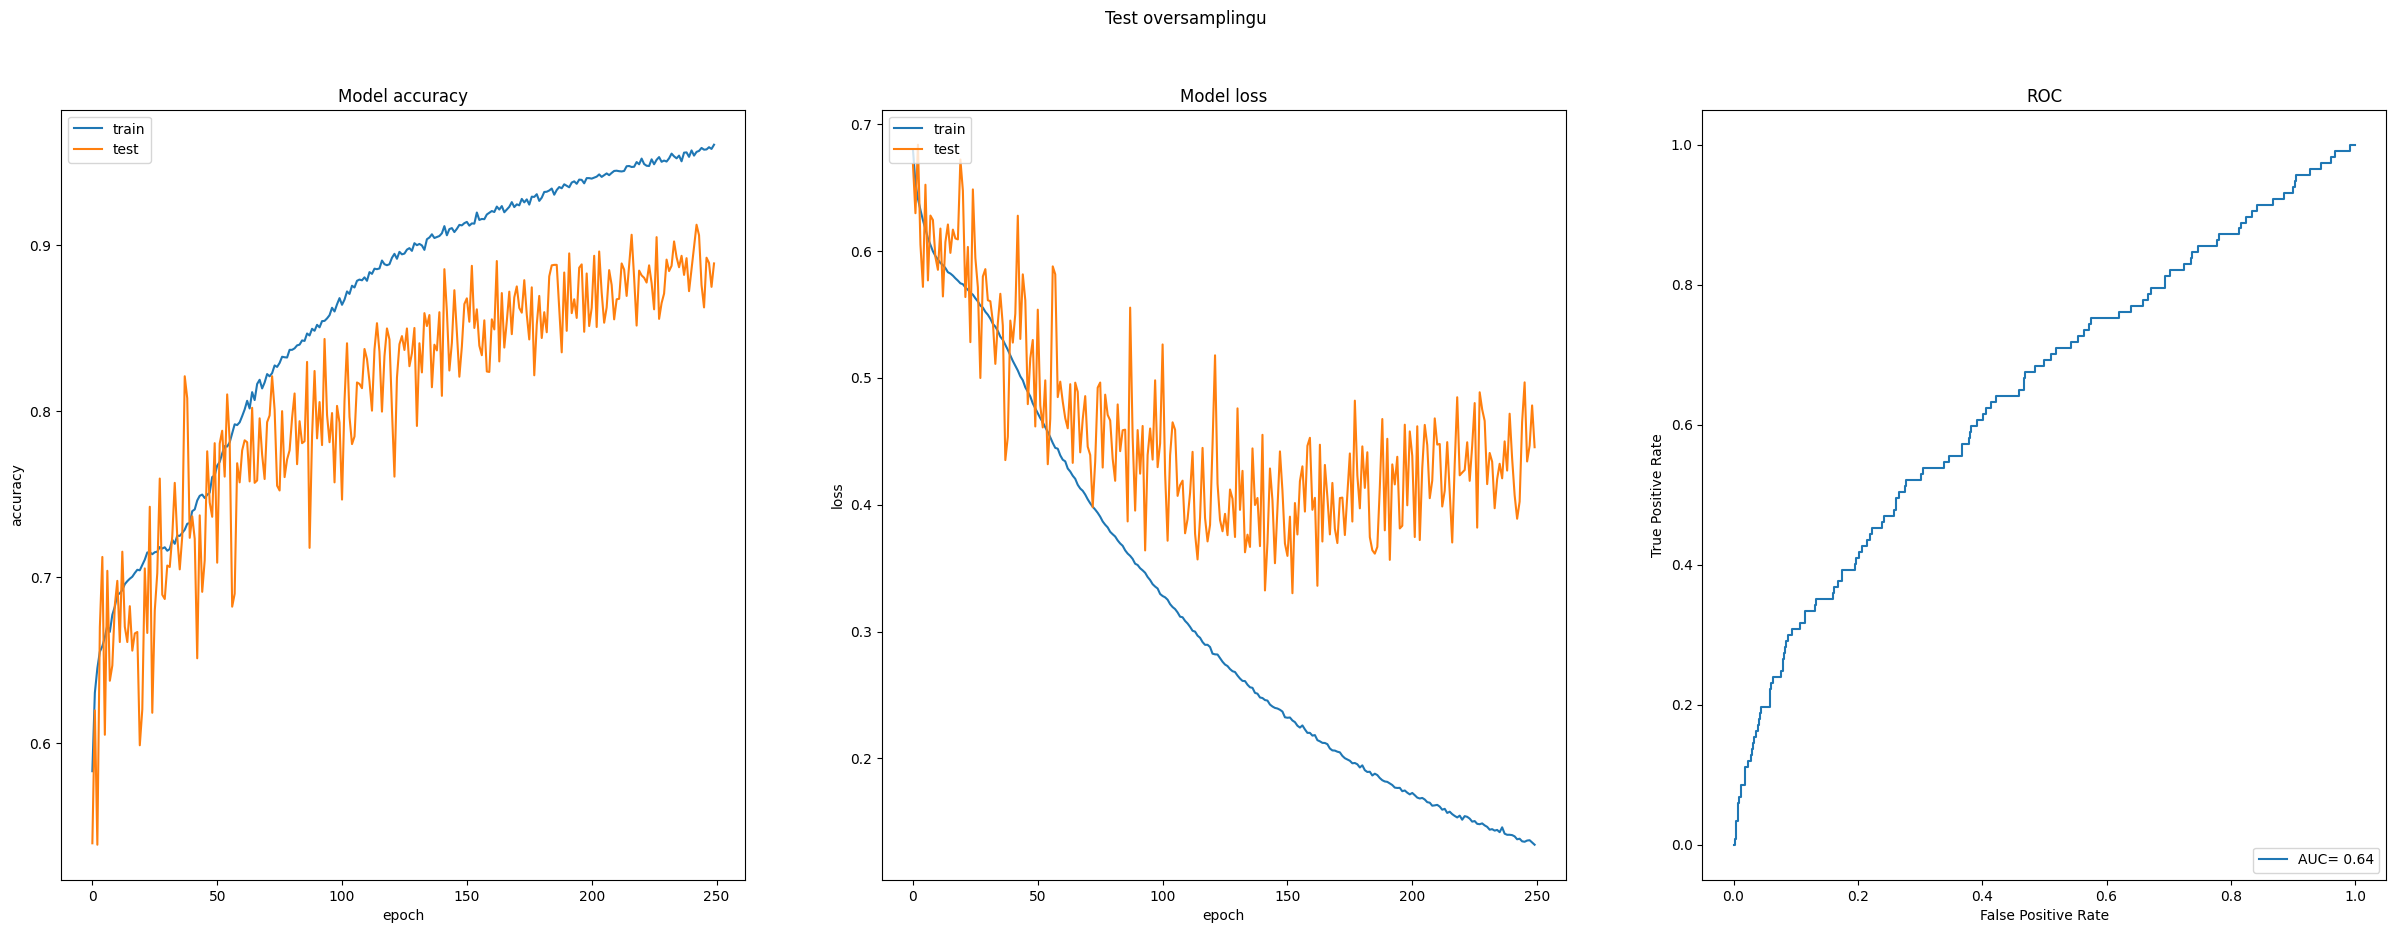

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      3357
           1       0.07      0.65      0.13       117

    accuracy                           0.70      3474
   macro avg       0.53      0.67      0.47      3474
weighted avg       0.95      0.70      0.79      3474




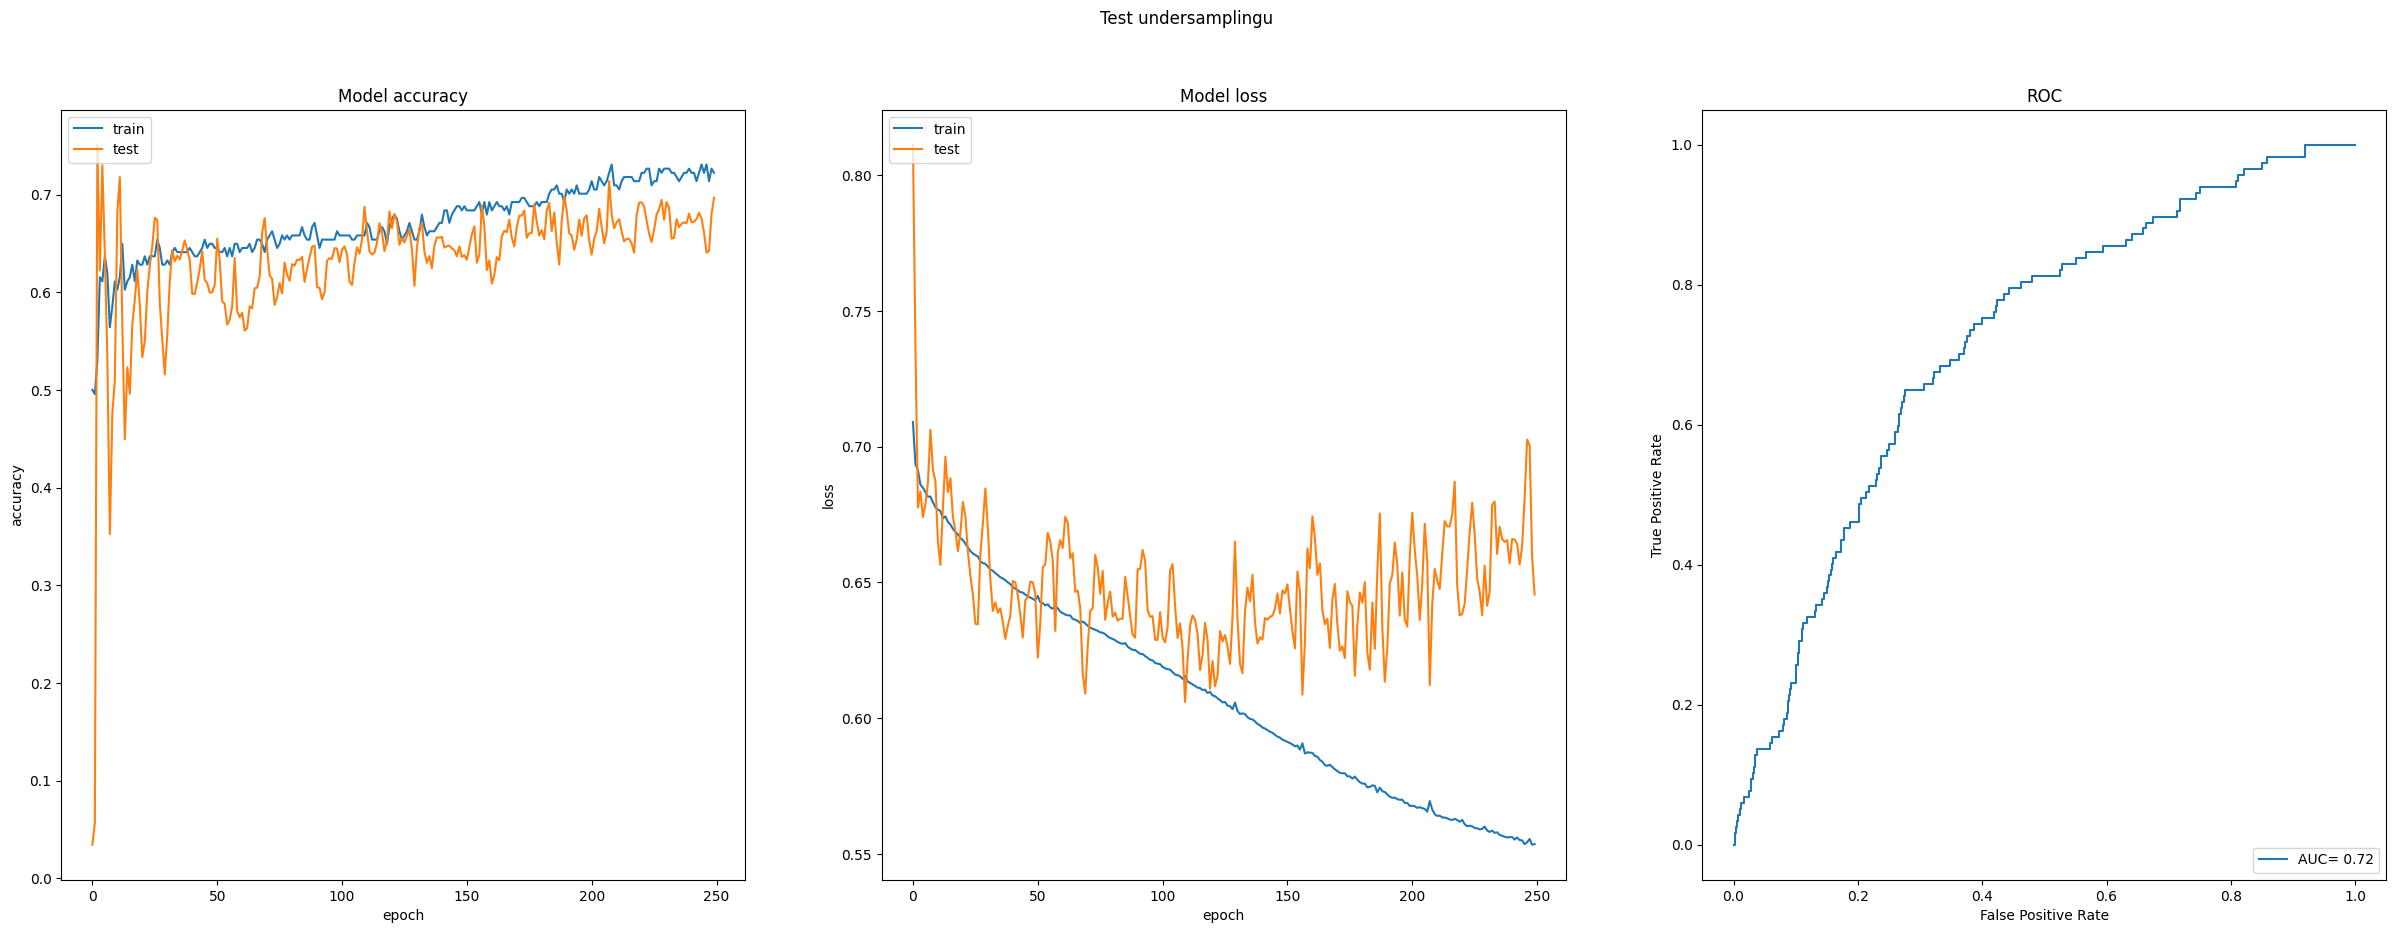

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3357
           1       0.14      0.01      0.02       117

    accuracy                           0.96      3474
   macro avg       0.55      0.50      0.50      3474
weighted avg       0.94      0.96      0.95      3474




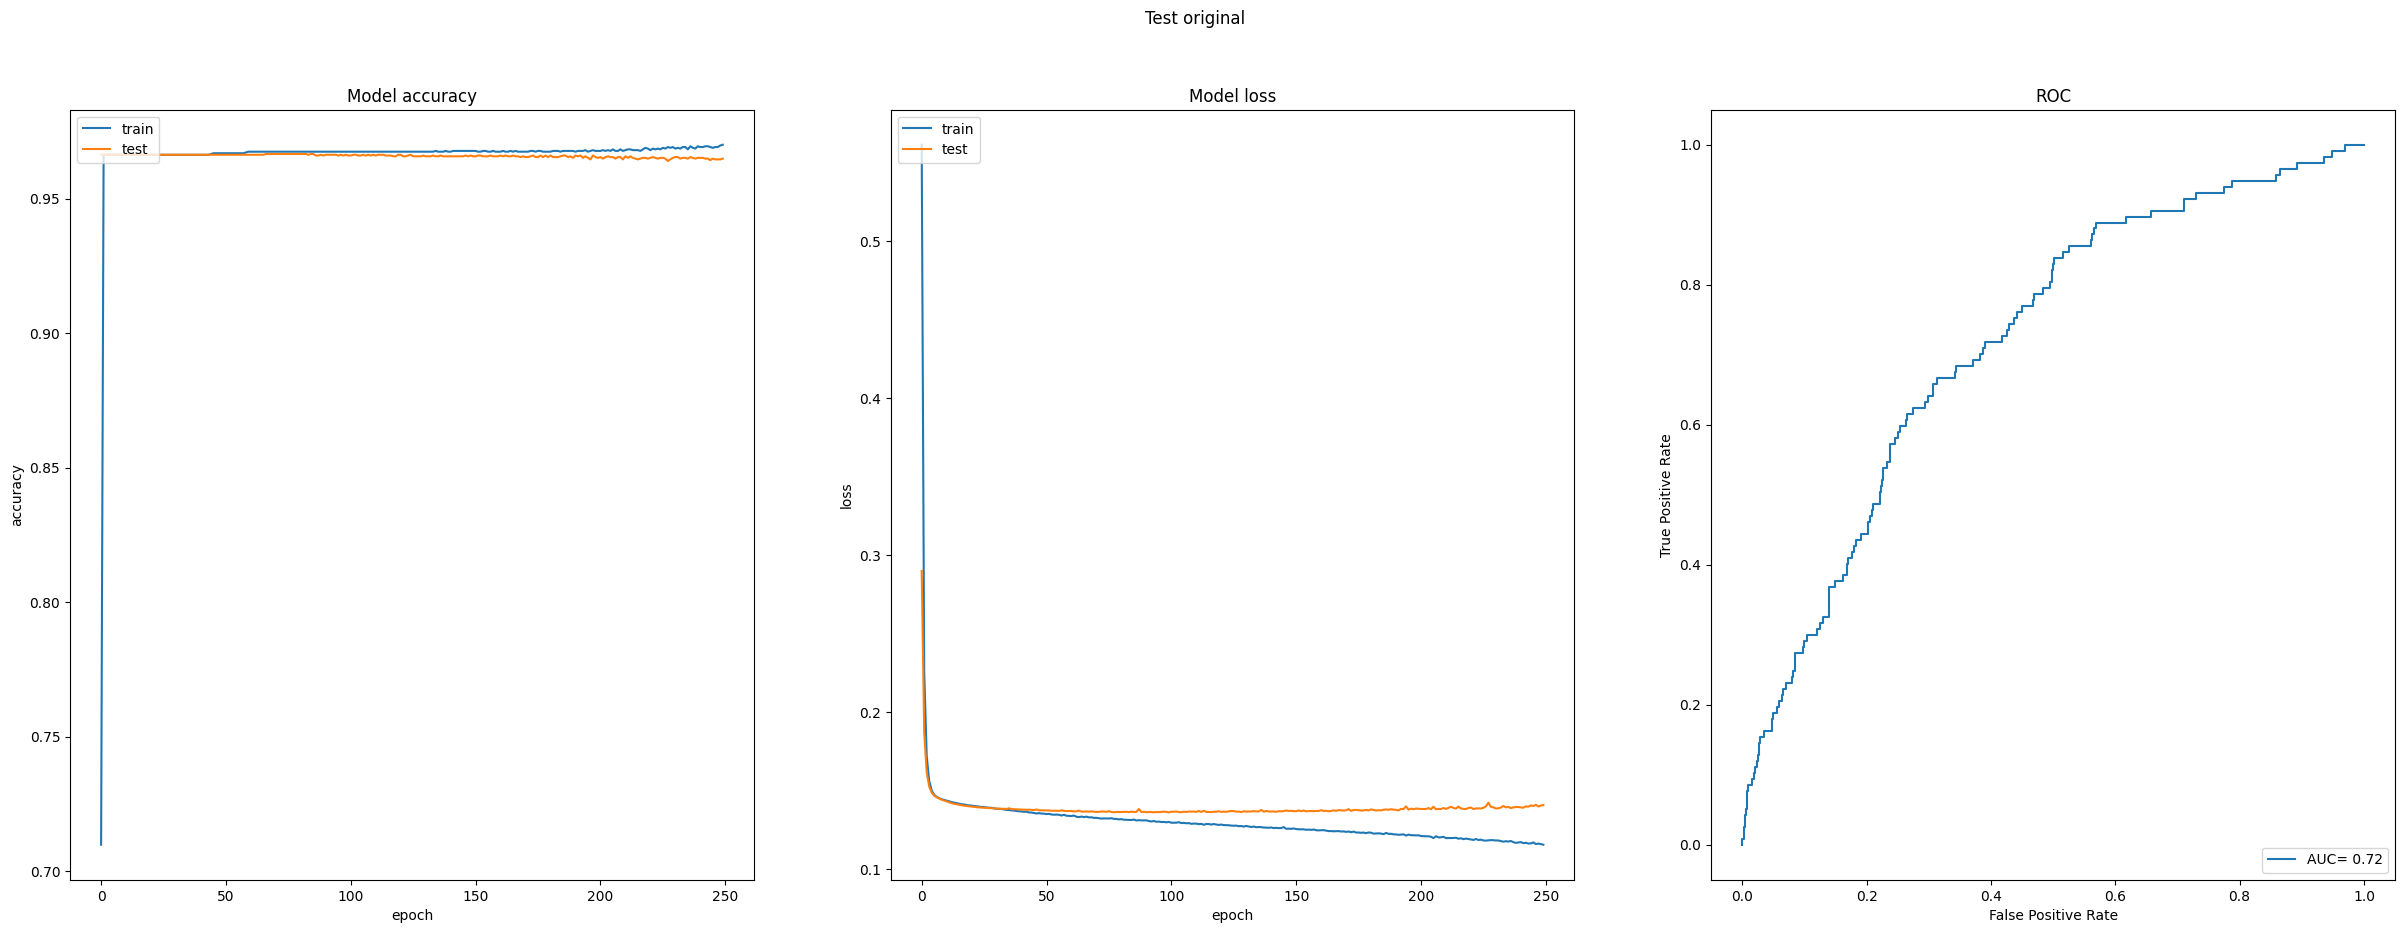

In [ ]:
# Test dla oversamplingu
ff_test_model('Test oversamplingu', data[0]['oversampled'], data[0]['test'], epochs=250)
# Test dla undersamplingu
ff_test_model('Test undersamplingu', data[0]['undersampled'], data[0]['test'], epochs=250)
# Test dla original
ff_test_model('Test original', data[0]['original'], data[0]['test'], epochs=250)

### Oversampling
poprawia rozpoznawanie klasy mniejszościowej (1), ale model nadal ma trudności z dokładnością (niskie precision).
### Undersampling
pozwala skuteczniej wykrywać klasę 1 (wyższy recall), jednak znacząco obniża wydajność dla klasy dominującej (0).
### Dane oryginalne
prowadzą do całkowitego ignorowania klasy mniejszościowej, co skutkuje zerowymi wynikami dla klasy 1.

### 5-letnia prognoza

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      3357
           1       0.06      0.70      0.12       117

    accuracy                           0.65      3474
   macro avg       0.52      0.67      0.45      3474
weighted avg       0.95      0.65      0.76      3474




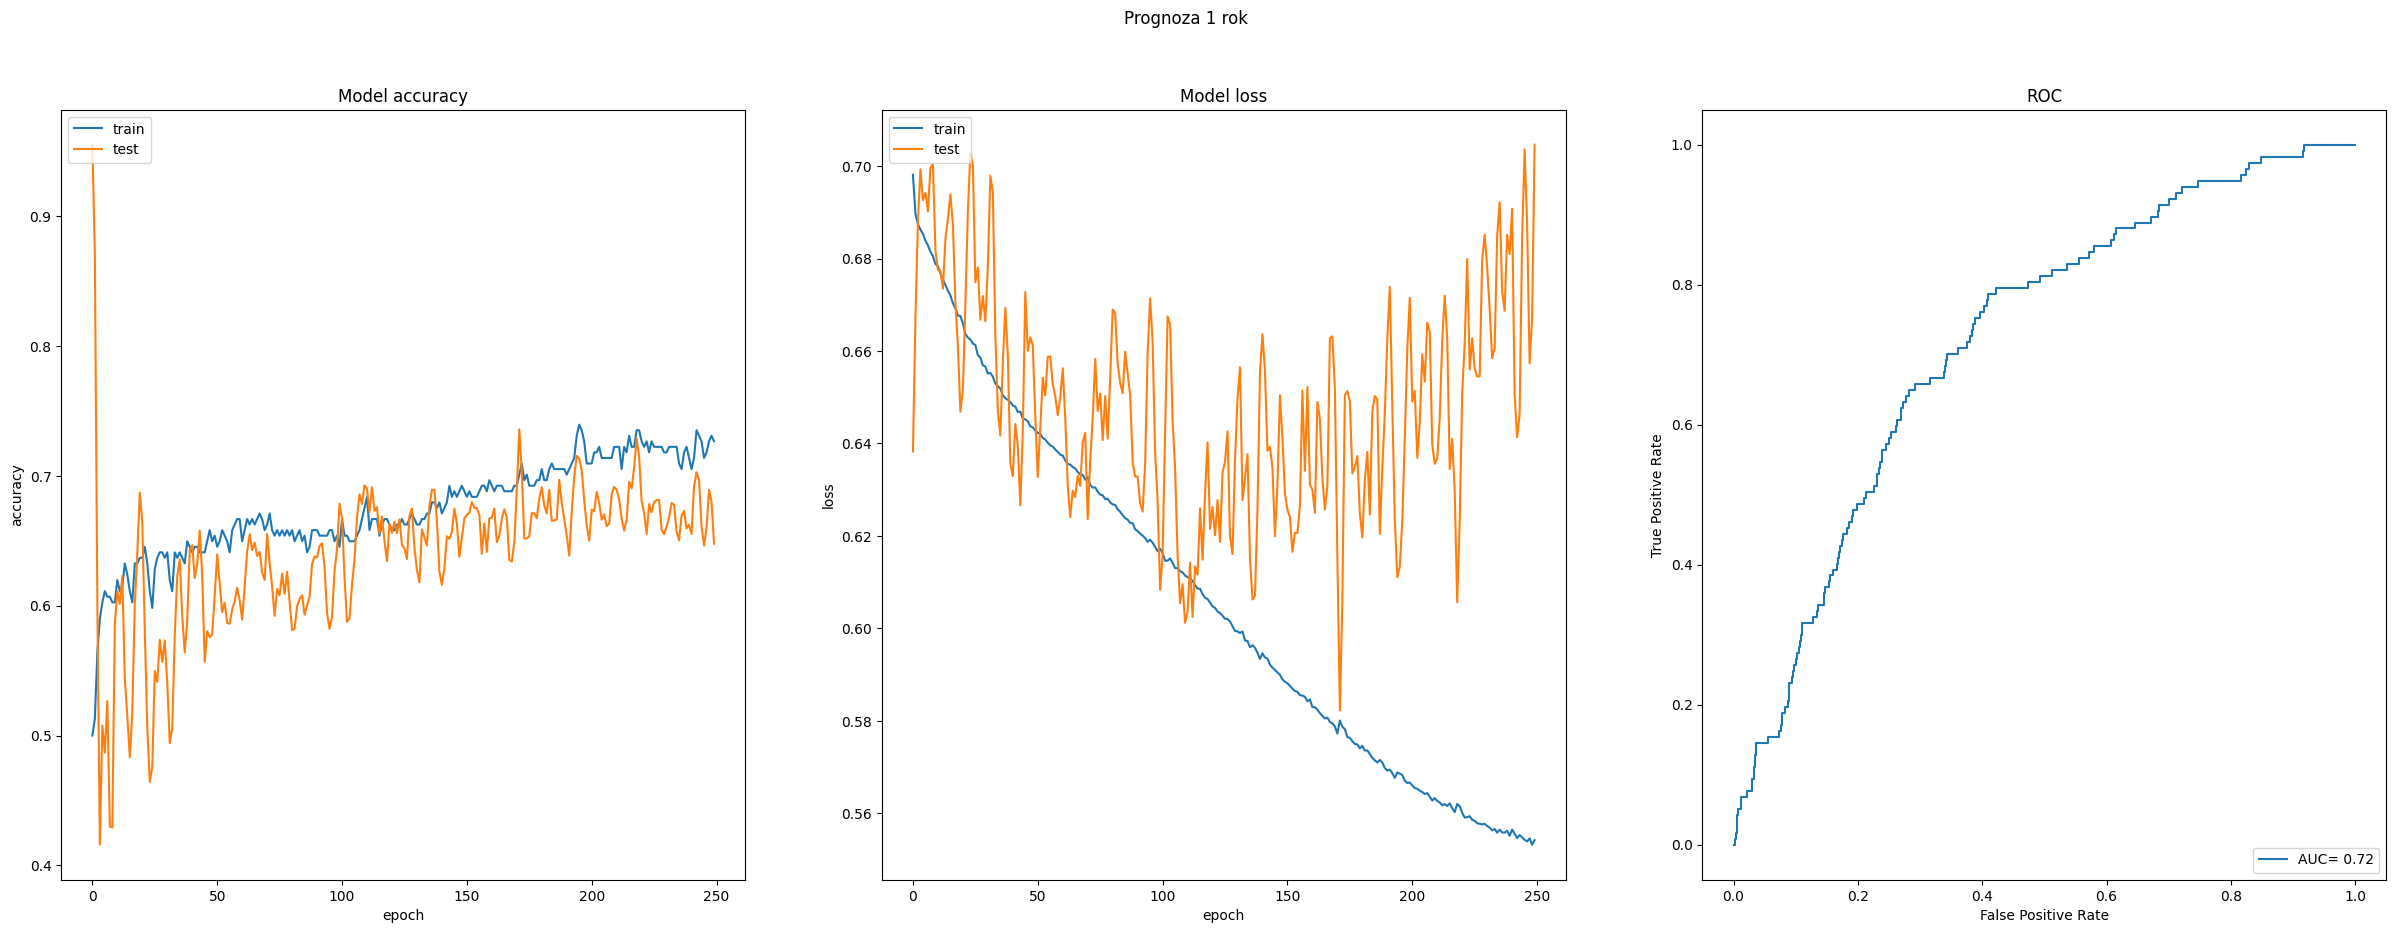

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.60      0.74      4836
           1       0.07      0.72      0.12       197

    accuracy                           0.60      5033
   macro avg       0.52      0.66      0.43      5033
weighted avg       0.95      0.60      0.72      5033




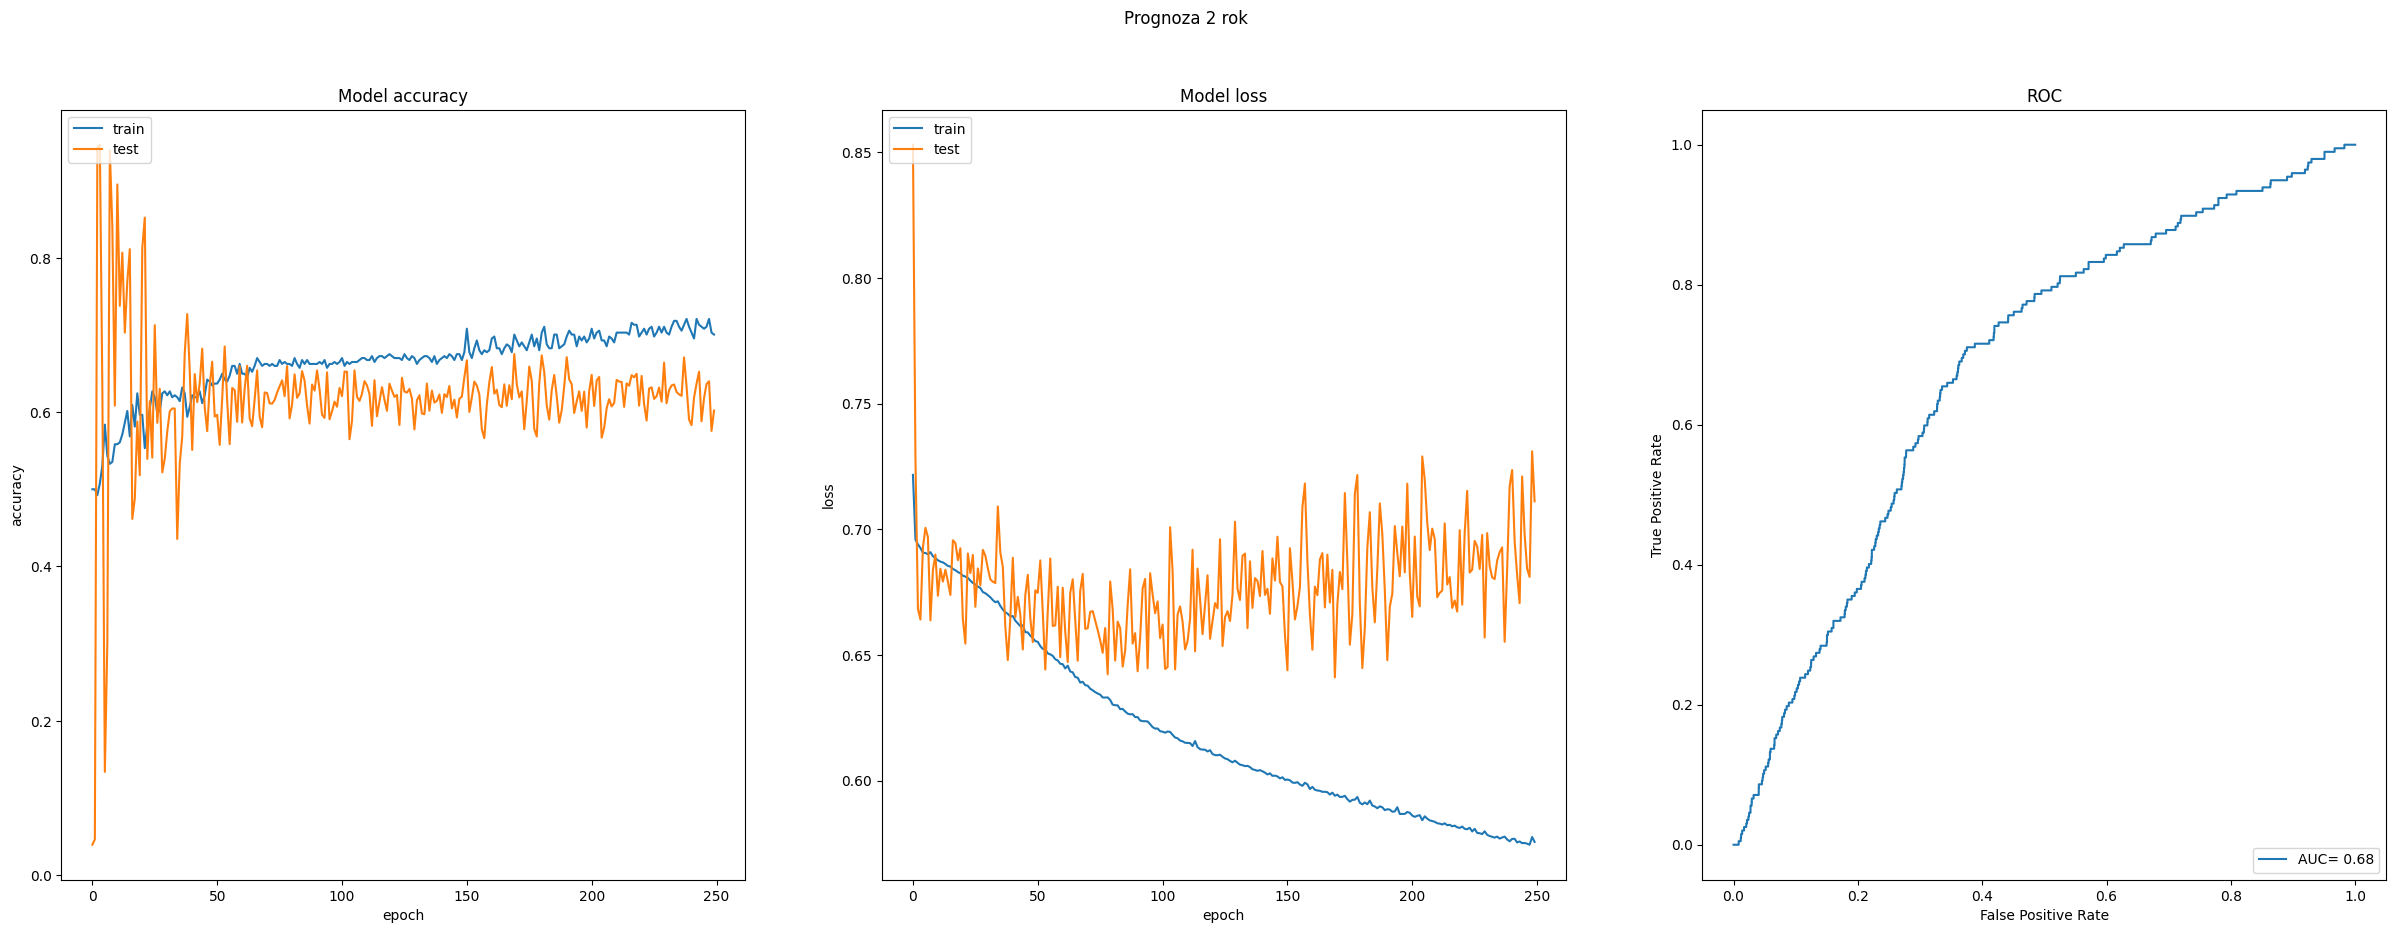

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.68      0.80      4960
           1       0.10      0.73      0.18       245

    accuracy                           0.68      5205
   macro avg       0.54      0.70      0.49      5205
weighted avg       0.94      0.68      0.77      5205




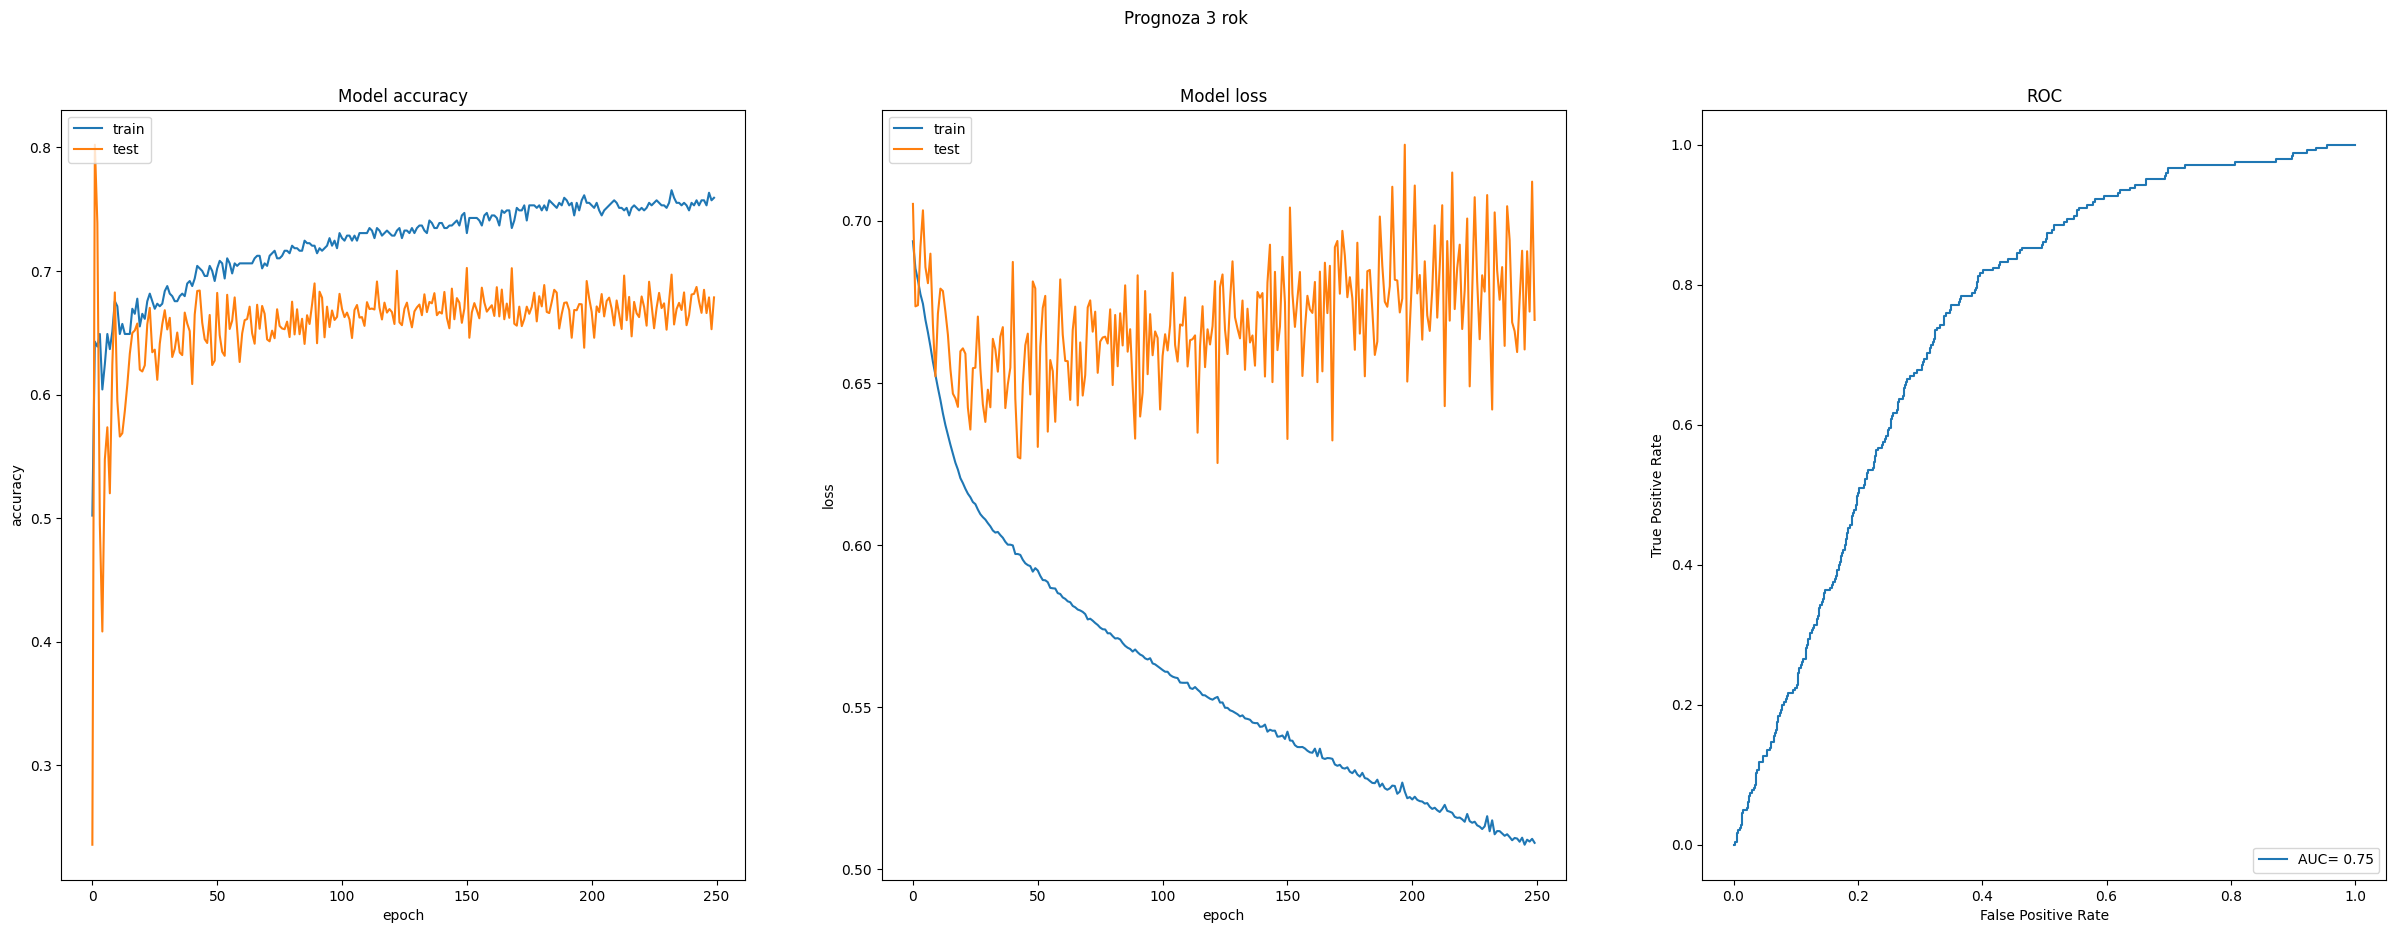

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      4591
           1       0.10      0.71      0.18       255

    accuracy                           0.66      4846
   macro avg       0.54      0.69      0.49      4846
weighted avg       0.93      0.66      0.76      4846




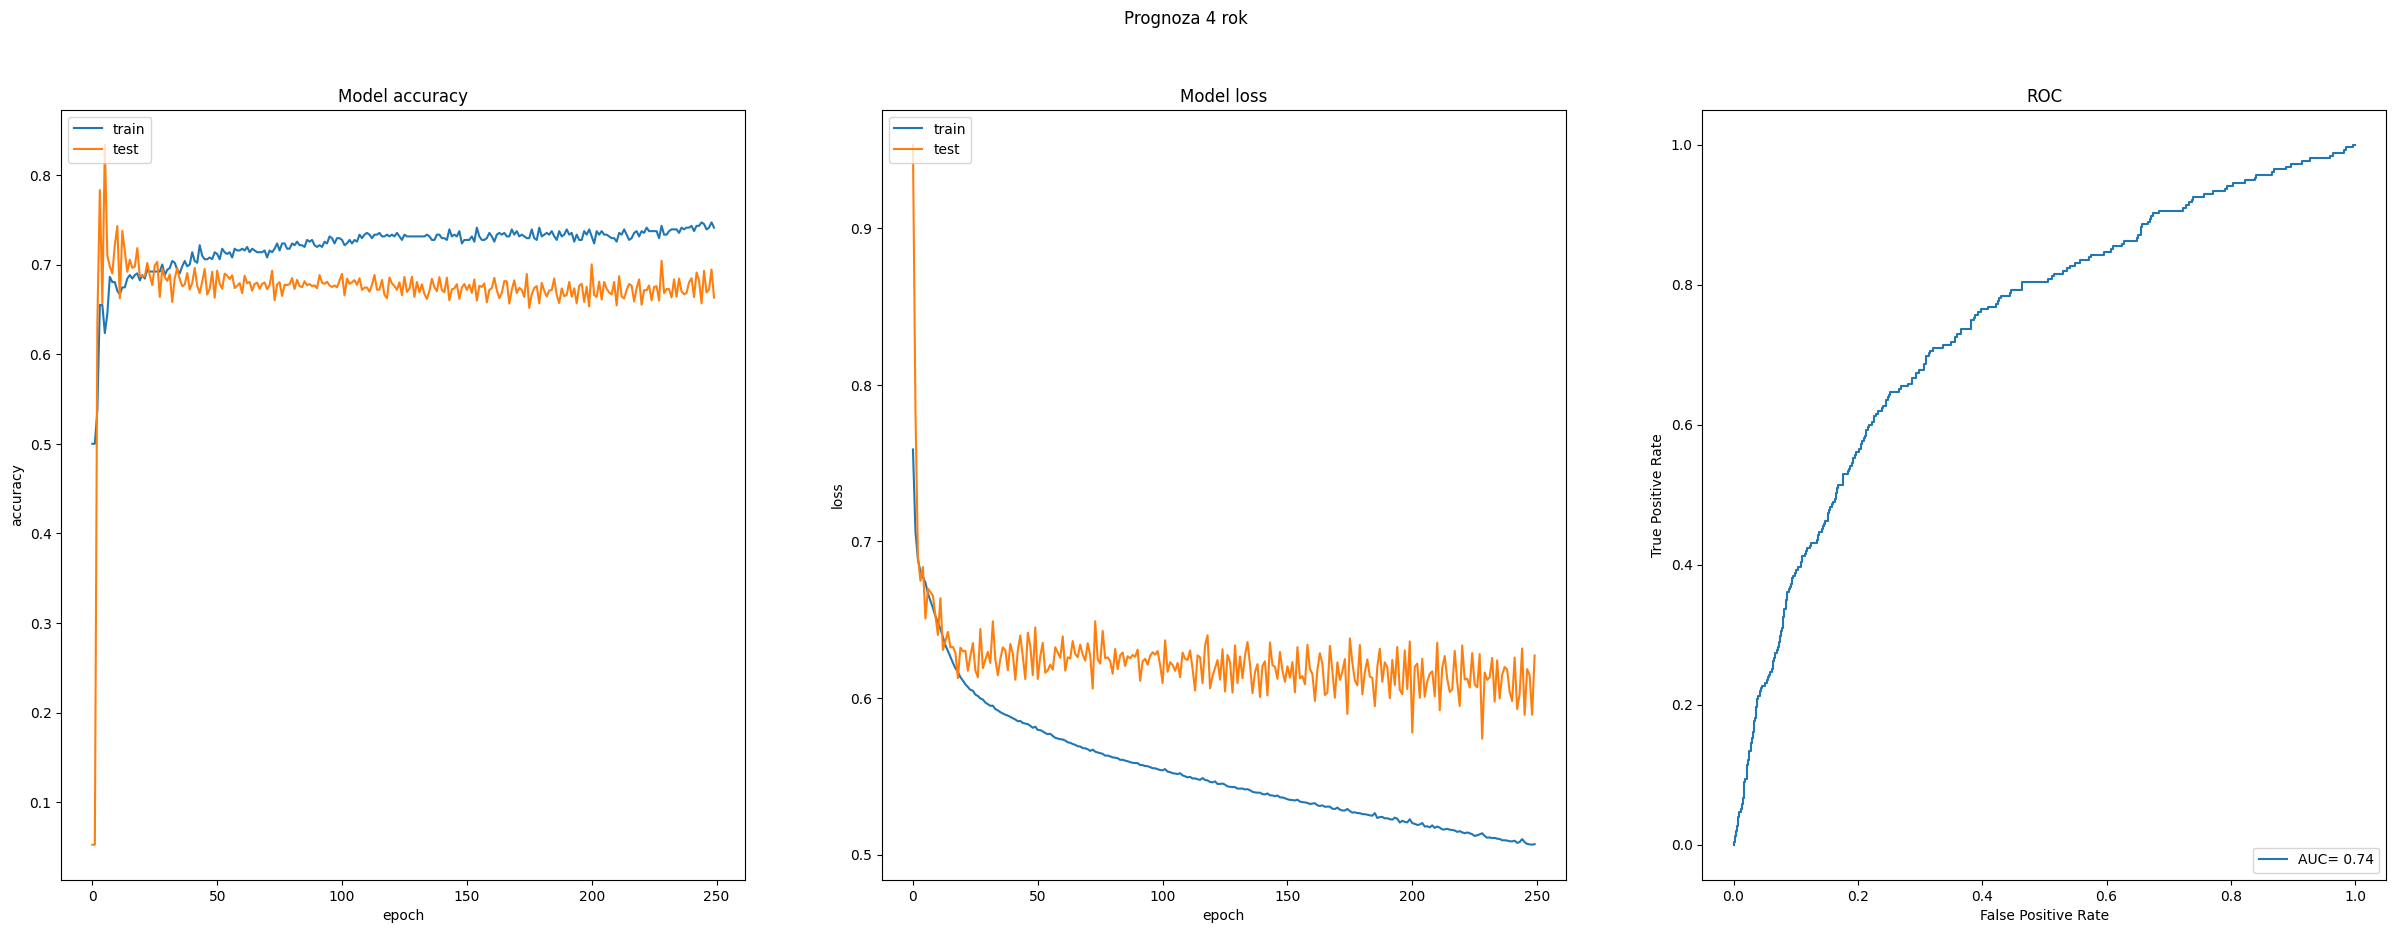

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2731
           1       0.19      0.72      0.31       203

    accuracy                           0.77      2934
   macro avg       0.58      0.75      0.59      2934
weighted avg       0.92      0.77      0.83      2934




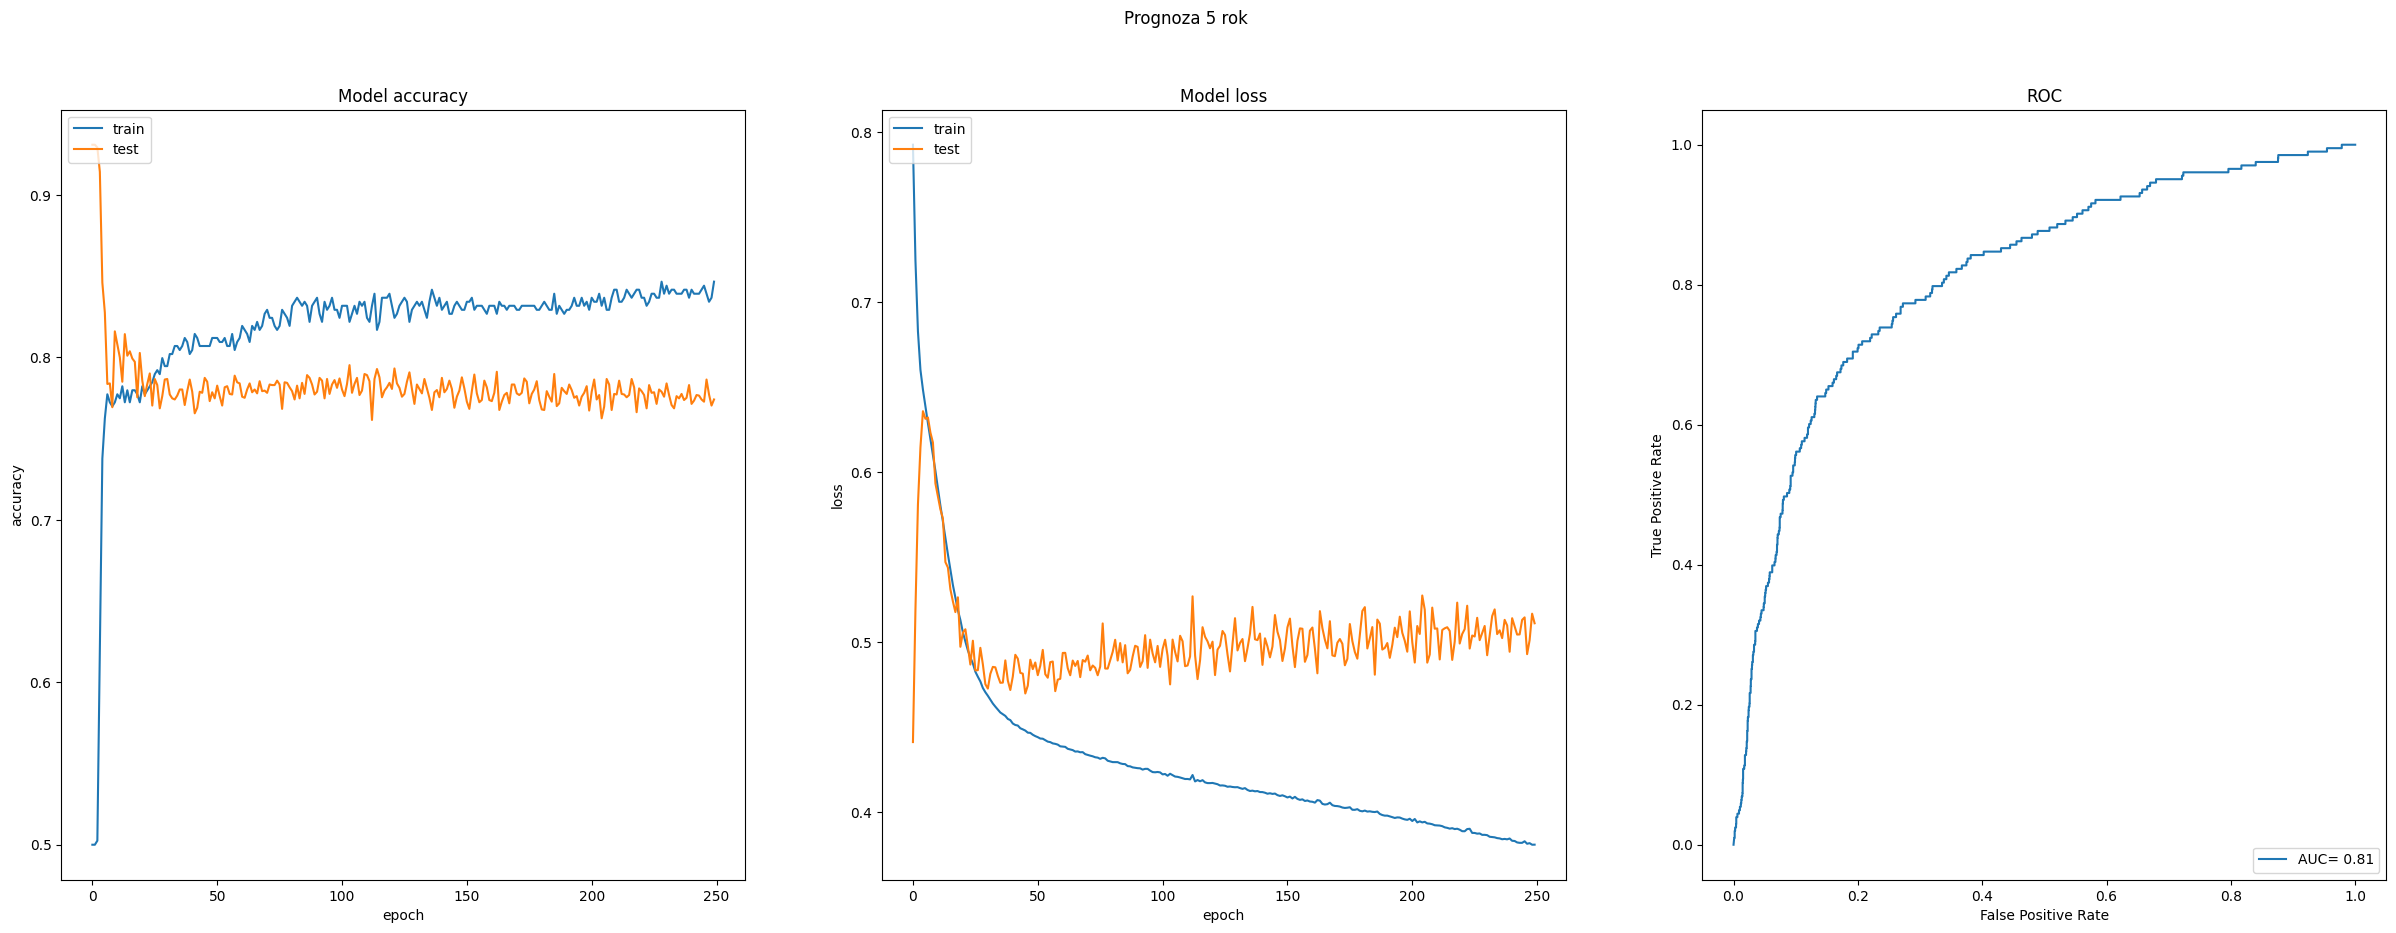

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tqdm.keras import TqdmCallback

EPOCHS = 250
balancing_method = 'undersampled' #zmniejszenie ilosci firm ktore nie zbankrutowaly do ilosci zbankrutowanych w danych do trenowania

for i in range(len(data)):
    ff_test_model(f'Prognoza {i+1} rok', data[i][balancing_method], data[i]['test'], epochs=EPOCHS)

 1. Wraz z wydłużaniem okresu prognozy, model wykazuje stopniową poprawę w rozpoznawaniu klasy mniejszościowej, szczególnie pod względem precision i F1-score.
 2. Recall klasy mniejszościowej utrzymuje się na wysokim poziomie we wszystkich prognozach, co wskazuje, że model dobrze identyfikuje większość przykładów klasy 1.
 3.  Wyniki dla klasy dominującej pozostają stabilnie wysokie, co oznacza, że wydłużenie okresu prognozy nie wpływa negatywnie na jej klasyfikację.
 4.  Prognoza 5-letnia wydaje się najlepiej zrównoważona między klasami, co może sugerować, że model lepiej radzi sobie z bardziej rozbudowanymi wzorcami w danych.




Wnioski:
wyniki pokazują, że model osiąga wysoką precyzję dla klasy 0, ale znacznie gorzej radzi sobie z klasą 1 (niskie precision, choć wysokie recall). Może to wskazywać na problem z nierównomiernością danych lub konieczność dostosowania architektury/modelu.

# SOM

Sieć SOM może nie być najlepszym wyborem dla tego problemu, biorąc pod uwagę że dane zawierają wyłącznie dane kategoryczne. Same kategorie niczym się od siebie nie różnią, więc znalezienie zależności powinno być ciężkie.

### Funkcje pomocnicze

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import metrics

class MonkSOM:
    SEED = 222
    labels = ['nie', 'tak']

    def __init__(self, train_set, size, epochs=250, **params):
        '''
        Trenuje model
        '''

        self.size = size
        self.params = params
        self.train_data = train_set['feature']
        self.train_target = train_set['target']
        self.som = MiniSom(size, size, self.train_data.shape[1], random_seed=MonkSOM.SEED, **params)

        self.som.pca_weights_init(self.train_data) #inicjalizacja wag neuronow
        self.som.train(self.train_data, epochs, verbose=False)

        self.label_map = self.som.labels_map(self.train_data, self.train_target)

        self.percentage_map = {}
        for position in self.label_map:
            self.percentage_map[position] = self.label_map[position][1] / sum(self.label_map[position].values())

    def classify(self, data):
        '''
        Klasyfikuje dane jako prawdopodobieństwo należenia do klasy
        '''

        default_class = 0
        result = []
        for d in data:
            win_position = self.som.winner(d)
            if win_position in self.percentage_map:
                result.append(self.percentage_map[win_position])
            else:
                result.append(default_class)

        return np.array(result)

    def classify_binary(self, data):
        '''
        Klasyfikuje dane jako binarny wynik - 0 lub 1
        '''

        return np.round(self.classify(data))

    def get_accuracy(self, test_set):
        '''
        Oblicza accuracy dla danych testowych
        '''

        predicted = self.classify_binary(test_set['feature'])
        return metrics.accuracy_score(test_set['target'], predicted)

    def get_auc(self, test_set):
        '''
        Oblicza AUC dla danych testowych
        '''

        predicted = self.classify(test_set['feature'])
        return metrics.roc_auc_score(test_set['target'], predicted)

    def display_net(self, test_set, title=None):
        '''
        Wyświetla wykres przynależności neuronów do klas, a także gdzie oryginalne dane wpadają do siatki
        '''

        predicted = self.classify(test_set['feature'])
        rounded = np.round(predicted)

        print(metrics.classification_report(test_set['target'], rounded, zero_division=0))
        print()

        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,9), constrained_layout=True)
        if title is not None:
            fig.suptitle(title)

        w_x, w_y = zip(*[self.som.winner(d) for d in self.train_data]) #obliczamy pozycje zwycieskich neuronow
        w_x = np.array(w_x)
        w_y = np.array(w_y)

        # rozkład danych treningowych

        ax1.clear()
        ax1.set_title('Lokalizacja danych w sieci')

        dist_map = self.som.distance_map().T

        for c in np.unique(self.train_target):
            idx_target = self.train_target == c
            ax1.scatter(
                w_x[idx_target] + 0.5 + (np.random.rand(np.sum(idx_target)) - 0.5) * 0.8,
                w_y[idx_target] + 0.5 + (np.random.rand(np.sum(idx_target)) - 0.5) * 0.8,
                s=50, label=self.labels[c]
            )

        ax1.legend(loc='upper right')
        ax1.grid()


        ax1.set_xticks(np.arange(self.size))
        ax1.set_yticks(np.arange(self.size))
        ax1.set_xlim(0, self.size)
        ax1.set_ylim(0, self.size)
        ax1.invert_yaxis()

        # przydział neuronów do klas

        ax2.clear()
        ax2.set_title('Klasyfikacja neuronów')

        cell_width = 1 / self.size
        cell_height = 1 / self.size

        colors = ['#1f77b4', '#ff7f0e']

        for (x, y), label_counts in self.label_map.items():
            center_x = x * cell_width + cell_width / 2
            center_y = 1 - (y * cell_height + cell_height / 2)

            label_fracs = [label_counts.get(l, 0) for l in range(2)]
            total = sum(label_fracs)

            if total > 0:
                normalized_fracs = [count / total for count in label_fracs]
                ax2.pie(
                    normalized_fracs,
                    colors=colors,
                    center=(center_x, center_y),
                    radius=min(cell_width, cell_height) / 2 * 0.8,
                    startangle=90,
                    frame=True
                )

        handles = [
            plt.Line2D([0], [0], marker='o', color=color, label=label,
                      markersize=10, markerfacecolor=color)
            for color, label in zip(colors, self.labels)
        ]
        ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

        ax2.set_xticks([])
        ax2.set_yticks([])
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)

        # wykres Roc

        fpr, tpr, _ = metrics.roc_curve(test_set['target'], predicted)
        auc = metrics.roc_auc_score(test_set['target'], predicted)

        ax3.clear()
        ax3.set_title('ROC')
        ax3.plot(fpr, tpr, label=f"AUC= {auc:.2f}")
        ax3.set_ylabel('True Positive Rate')
        ax3.set_xlabel('False Positive Rate')
        ax3.legend(loc=4)

        plt.show()


### Szukanie parametrów

W tym przypadku nie ma żadnej podpowiedzi dotyczącej oczekiwanych parametrów. Konieczne jest eksperymentowanie. Ponownie wykorzystam do tego celu bibliotekę `optuna`

In [ ]:
import optuna

SOM_BALANCING = 'undersampled'

def generate_params(trial):
    '''
    Generuje zestaw parametrów dla danej próby
    '''

    params = {
        'size': trial.suggest_int('size', 5, 25),
        'sigma': trial.suggest_float('sigma', 0.1, 5.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 5.0),
        'neighborhood_function': trial.suggest_categorical('neighborhood_function', ['gaussian', 'mexican_hat', 'bubble', 'triangle'])
    }

    return params

def optimize_single(i, trial):
    '''
    Oblicza skuteczność modelu dla danej próby
    '''

    params = generate_params(trial)
    som = MonkSOM(data[i][SOM_BALANCING], **params)

    return som.get_auc(data[i]['test'])*5 + som.get_accuracy(data[i]['test'])

def find_one(i):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: optimize_single(i, trial), n_trials=300, show_progress_bar=True)
    print(f'znalezione parametry dla problemu {i+1}: ', study.best_params)

    return study.best_params

def test_som(title, params):
    som1 = MonkSOM(data[0][SOM_BALANCING], **params)

    som1.display_net(data[0]['test'], title)
    plt.show()

## **Wyniki dla poszczególnych lat dla SOM**

### Prognoza 1 rok

In [ ]:
problem1 = find_one(0)

  0%|          | 0/300 [00:00<?, ?it/s]

znalezione parametry dla problemu 1:  {'size': 6, 'sigma': 3.465999577268832, 'learning_rate': 1.5296540897142057, 'neighborhood_function': 'bubble'}


              precision    recall  f1-score   support

           0       0.98      0.67      0.80      3357
           1       0.06      0.57      0.10       117

    accuracy                           0.67      3474
   macro avg       0.52      0.62      0.45      3474
weighted avg       0.95      0.67      0.77      3474




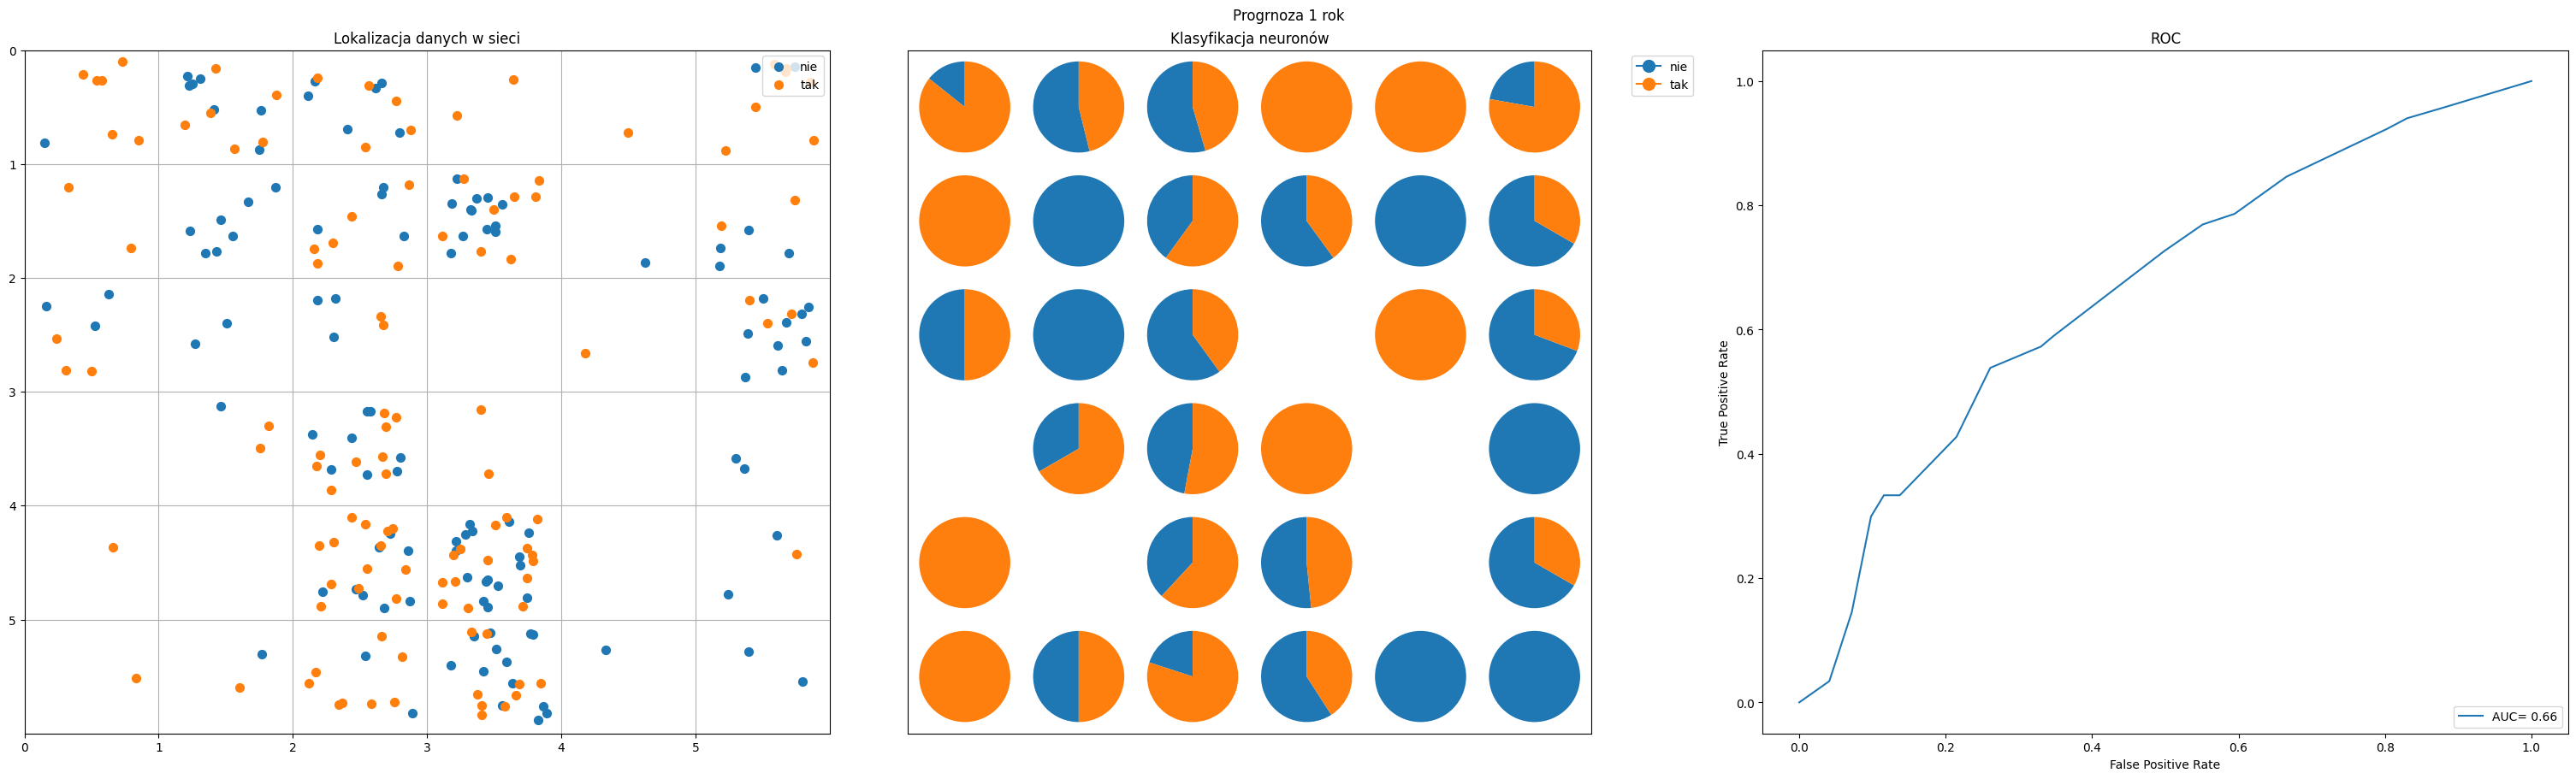

In [ ]:
test_som('Progrnoza 1 rok', problem1)

### Prognoza 2 lata

In [ ]:
# Wariant tylko dla problemu nr. 2
problem2 = find_one(1)

  0%|          | 0/300 [00:00<?, ?it/s]

znalezione parametry dla problemu 2:  {'size': 14, 'sigma': 1.6875374464911612, 'learning_rate': 3.903710991121331, 'neighborhood_function': 'gaussian'}


              precision    recall  f1-score   support

           0       0.97      0.61      0.75      3357
           1       0.04      0.49      0.08       117

    accuracy                           0.60      3474
   macro avg       0.51      0.55      0.41      3474
weighted avg       0.94      0.60      0.72      3474




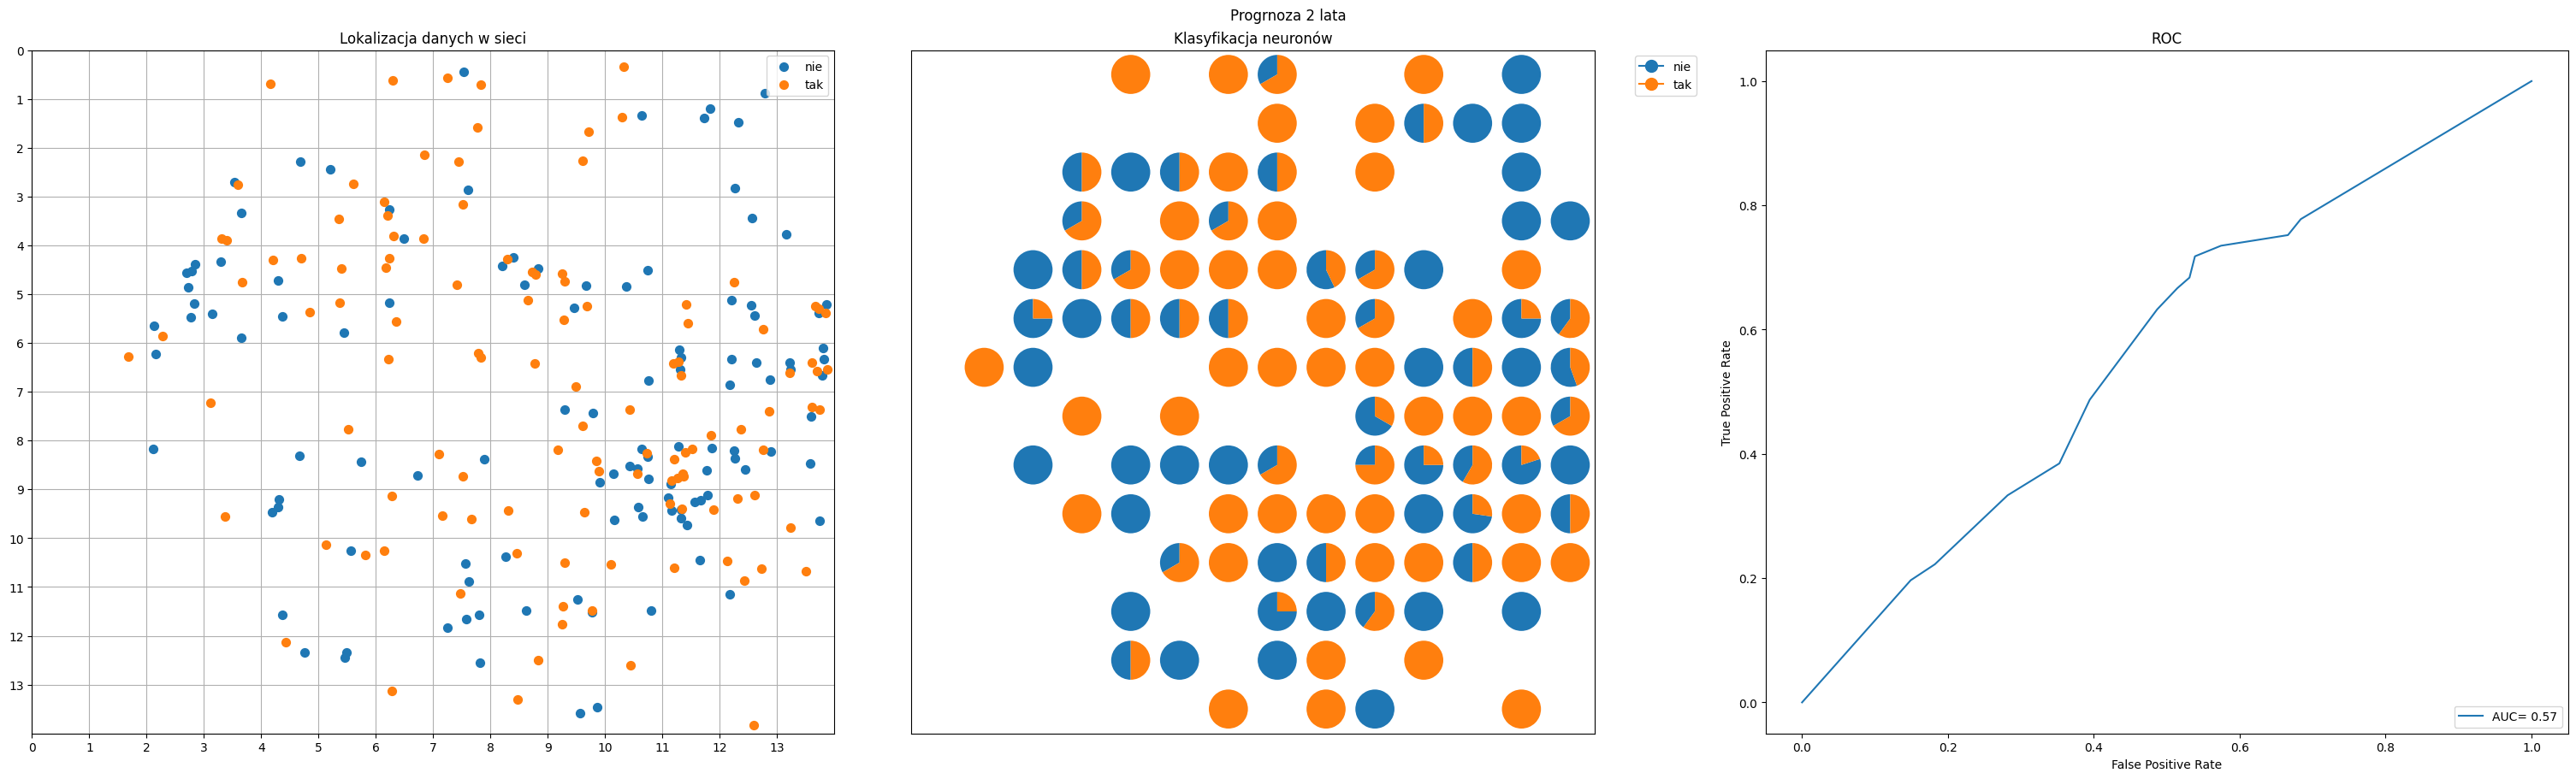

In [ ]:
test_som('Progrnoza 2 lata', problem2)

### Prognoza 3 lata

In [ ]:
# Wariant tylko dla problemu nr. 3
problem3 = find_one(2)

  0%|          | 0/300 [00:00<?, ?it/s]

znalezione parametry dla problemu 3:  {'size': 15, 'sigma': 2.4179314732269352, 'learning_rate': 1.7941759840995017, 'neighborhood_function': 'triangle'}


              precision    recall  f1-score   support

           0       0.98      0.59      0.74      3357
           1       0.05      0.56      0.09       117

    accuracy                           0.59      3474
   macro avg       0.51      0.58      0.41      3474
weighted avg       0.94      0.59      0.72      3474




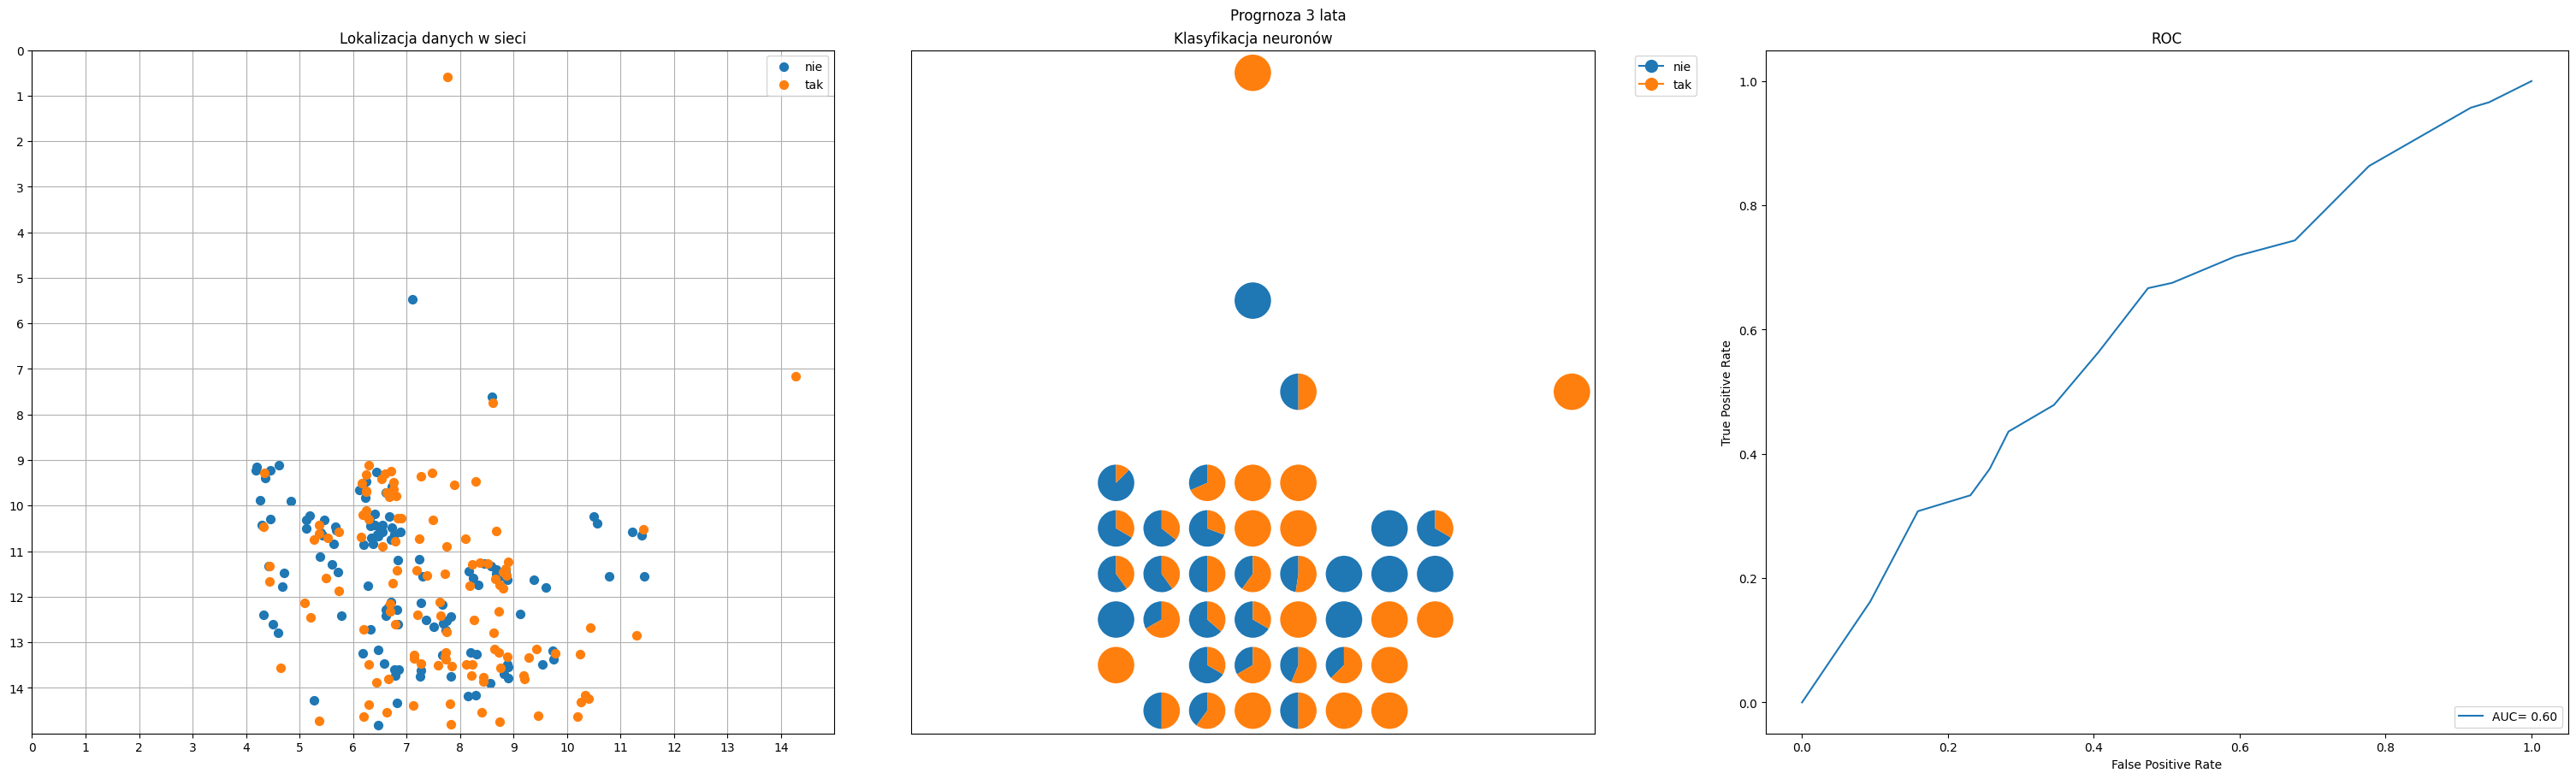

In [ ]:
test_som('Progrnoza 3 lata', problem3)

### Prognoza 4 lata

In [ ]:
problem4 = find_one(3)

  0%|          | 0/300 [00:00<?, ?it/s]

znalezione parametry dla problemu 4:  {'size': 5, 'sigma': 4.00966074282339, 'learning_rate': 0.3555171361491325, 'neighborhood_function': 'triangle'}


              precision    recall  f1-score   support

           0       0.98      0.58      0.73      3357
           1       0.05      0.62      0.09       117

    accuracy                           0.58      3474
   macro avg       0.51      0.60      0.41      3474
weighted avg       0.95      0.58      0.71      3474




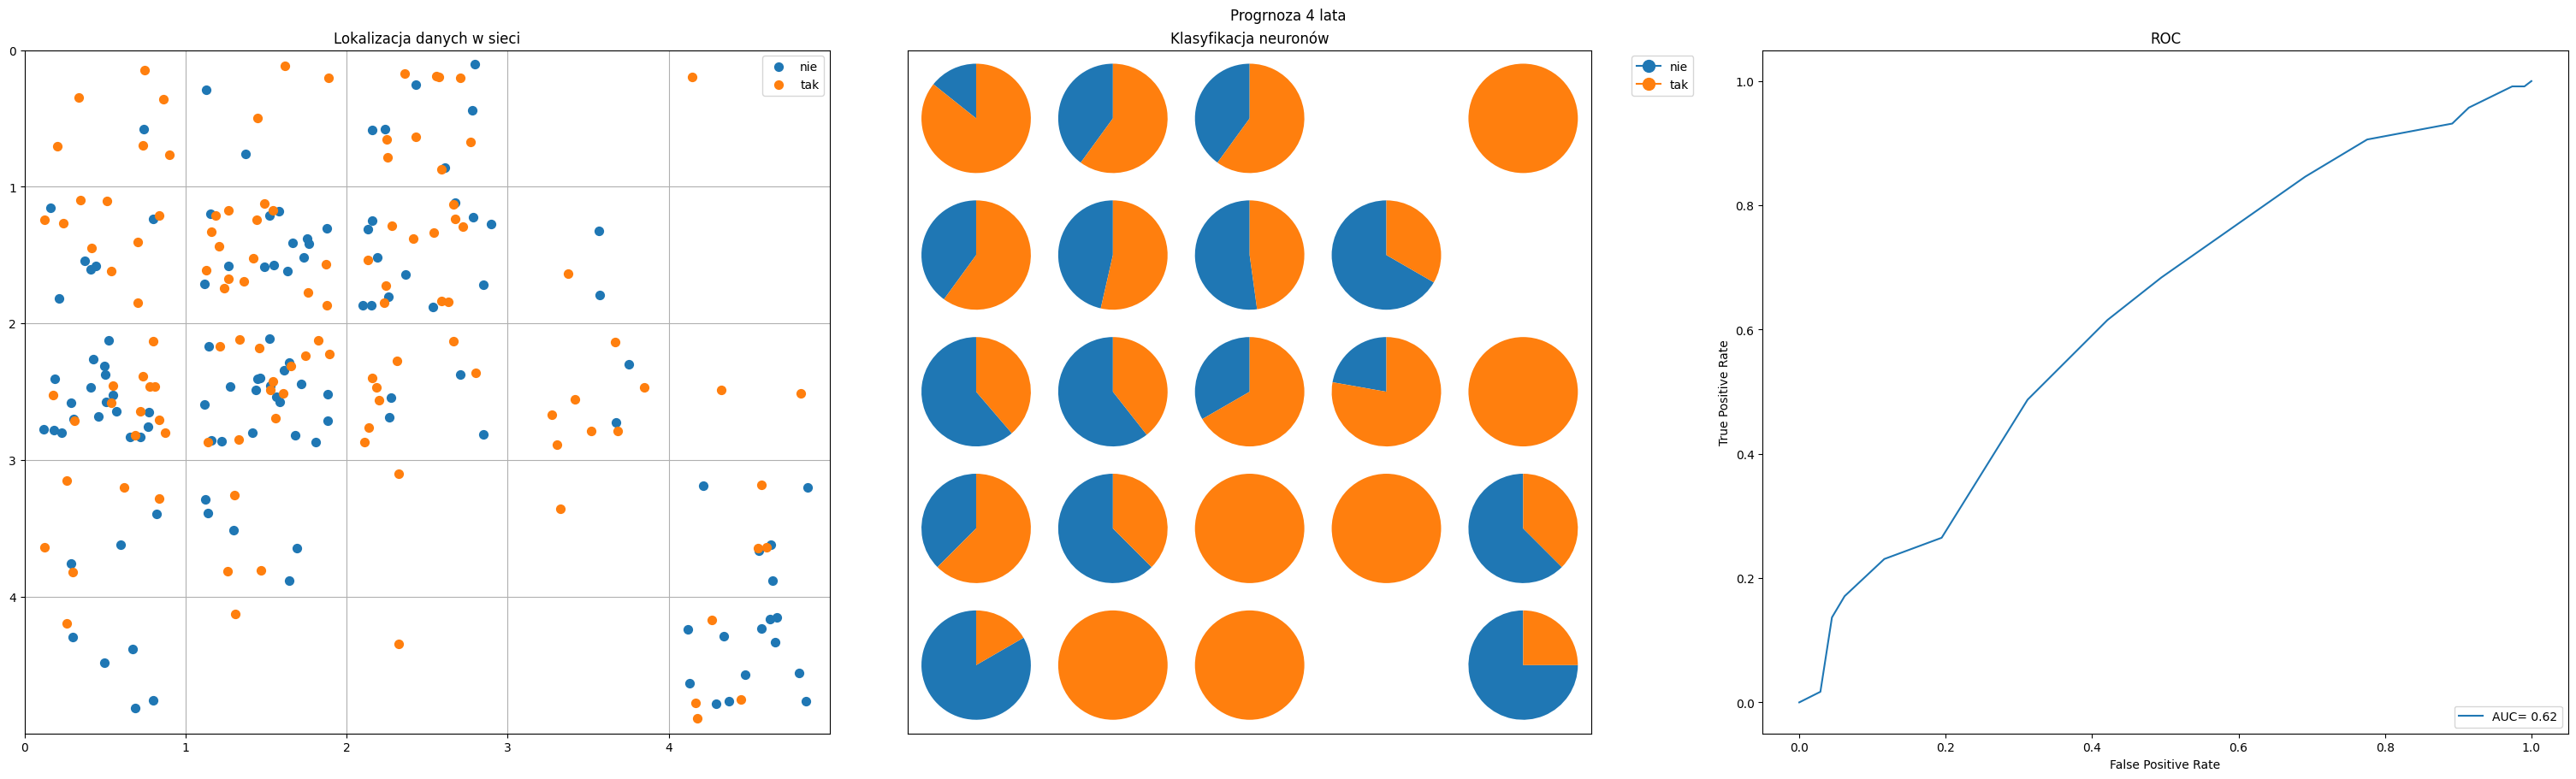

In [ ]:
test_som('Progrnoza 4 lata', problem4)

### Prognoza 5 lat

In [ ]:
problem5 = find_one(4)

  0%|          | 0/300 [00:00<?, ?it/s]

znalezione parametry dla problemu 5:  {'size': 8, 'sigma': 2.933134350557085, 'learning_rate': 0.8120842107831839, 'neighborhood_function': 'bubble'}


              precision    recall  f1-score   support

           0       0.97      0.73      0.83      3357
           1       0.04      0.36      0.08       117

    accuracy                           0.71      3474
   macro avg       0.51      0.54      0.45      3474
weighted avg       0.94      0.71      0.80      3474




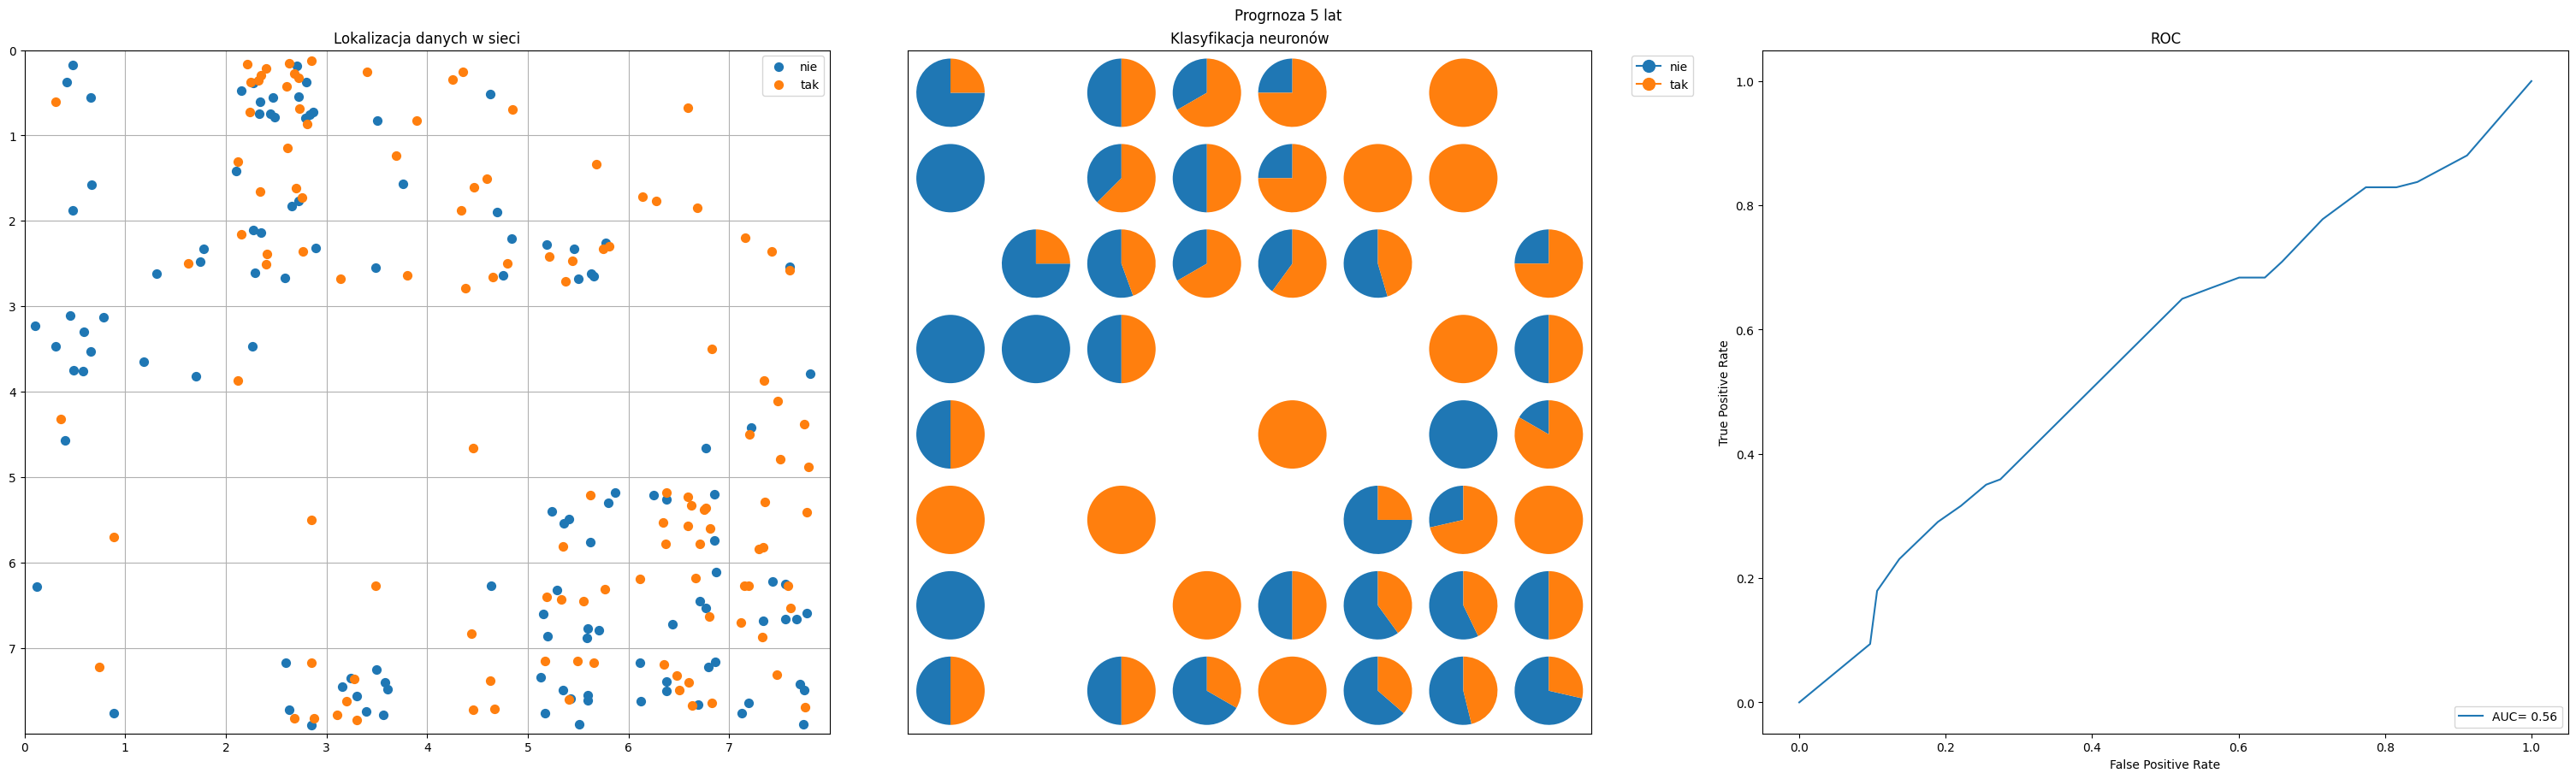

In [ ]:
test_som('Progrnoza 5 lat', problem5)